<a href="https://colab.research.google.com/github/SuhasDaniel9848/random-stuff/blob/main/PropGrowthX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Basic data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

# TensorFlow for deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# For file upload in Colab
from google.colab import files

print("All libraries imported successfully!")

All libraries imported successfully!


In [11]:
# Upload the CSV file
print("Please upload your real_estate_data.csv file")
uploaded = files.upload()

# Read the CSV file
df = pd.read_csv(list(uploaded.keys())[0])

# Display first 5 rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display last 5 rows
print("\nLast 5 rows of the dataset:")
print(df.tail())

Please upload your real_estate_data.csv file


Saving NYC_House_Dataset-Cleaned.csv to NYC_House_Dataset-Cleaned (2).csv

First 5 rows of the dataset:
                                     BROKERTITLE            TYPE   PRICE  \
0    Brokered by Douglas Elliman  -111 Fifth Ave  Condo for sale  315000   
1                         Brokered by Sowae Corp  House for sale  260000   
2                            Brokered by COMPASS  Condo for sale   69000   
3                         Brokered by Sowae Corp  House for sale  690000   
4  Brokered by Douglas Elliman - 575 Madison Ave  Condo for sale  899500   

   BEDS  BATH  PROPERTYSQFT                  ADDRESS                    STATE  \
0     2   2.0   1400.000000     2 E 55th St Unit 803       New York, NY 10022   
1     4   2.0   2015.000000         620 Sinclair Ave  Staten Island, NY 10312   
2     3   1.0    445.000000  2 E 55th St Unit 908W33      Manhattan, NY 10022   
3     5   2.0   4004.000000              584 Park Pl       Brooklyn, NY 11238   
4     2   2.0   2184.207862   157 

In [12]:
# Basic data exploration
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# Basic cleaning
# Replace 2184.207862 with NaN
df.replace(2184.207862, np.nan, inplace=True)

# Convert price to numeric
df['PRICE'] = pd.to_numeric(df['PRICE'], errors='coerce')

# Statistical summary
print("\nStatistical Summary:")
print(df.describe())

Dataset Shape: (4552, 17)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4552 entries, 0 to 4551
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4552 non-null   object 
 1   TYPE                         4552 non-null   object 
 2   PRICE                        4552 non-null   int64  
 3   BEDS                         4552 non-null   int64  
 4   BATH                         4552 non-null   float64
 5   PROPERTYSQFT                 4552 non-null   float64
 6   ADDRESS                      4552 non-null   object 
 7   STATE                        4552 non-null   object 
 8   MAIN_ADDRESS                 4552 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4552 non-null   object 
 10  LOCALITY                     4552 non-null   object 
 11  SUBLOCALITY                  4552 non-null   object 
 12  STREET_NAME                  4552 n

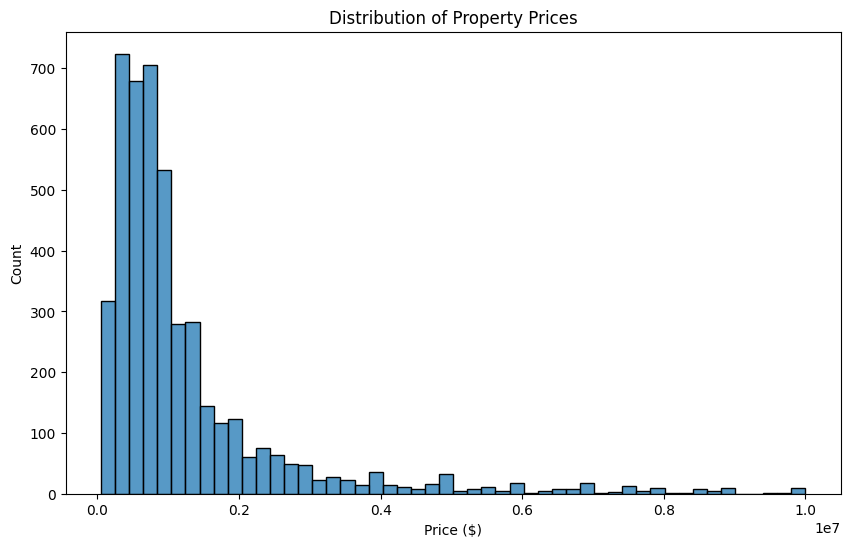

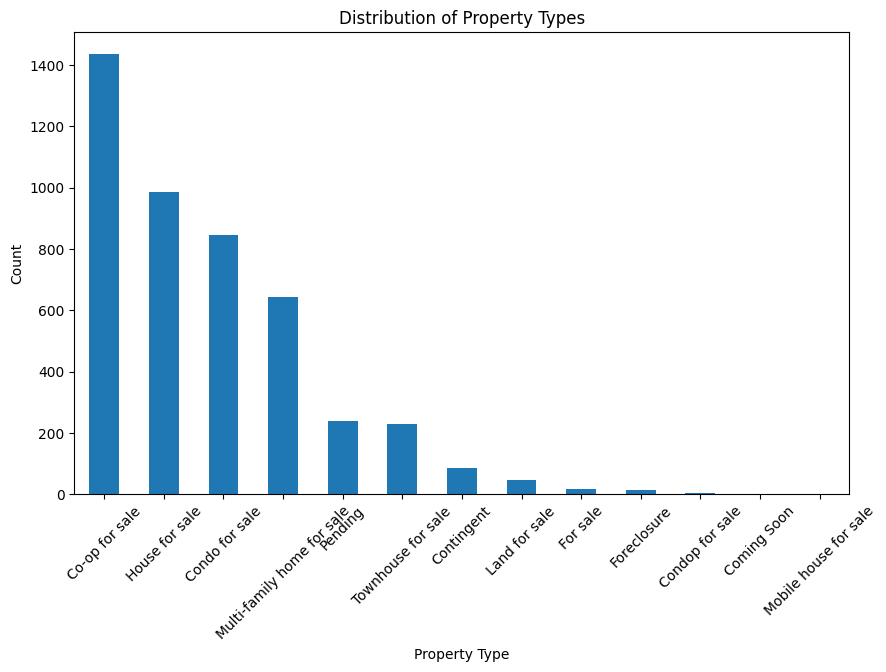

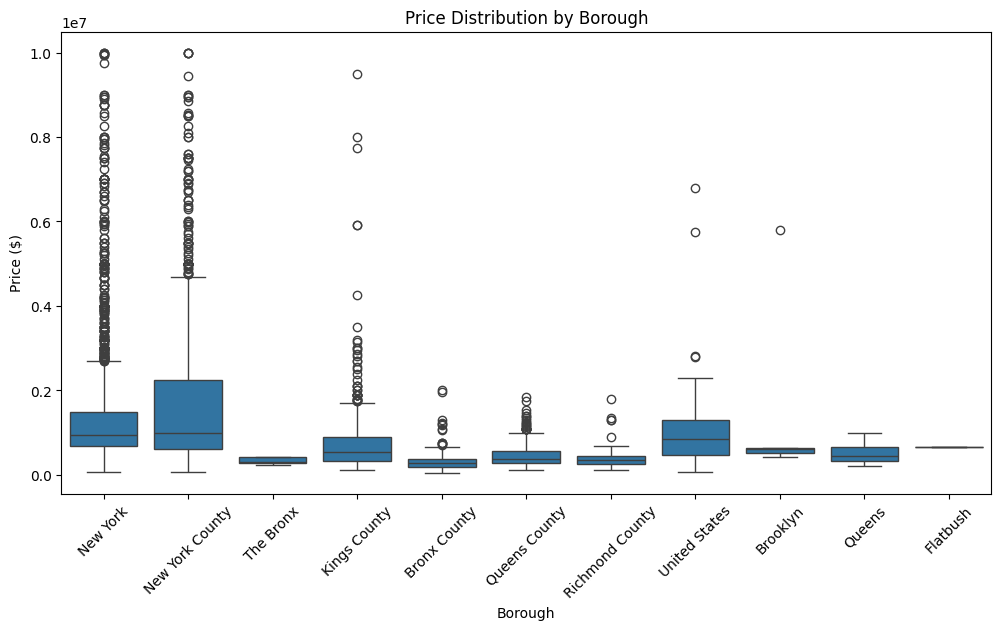

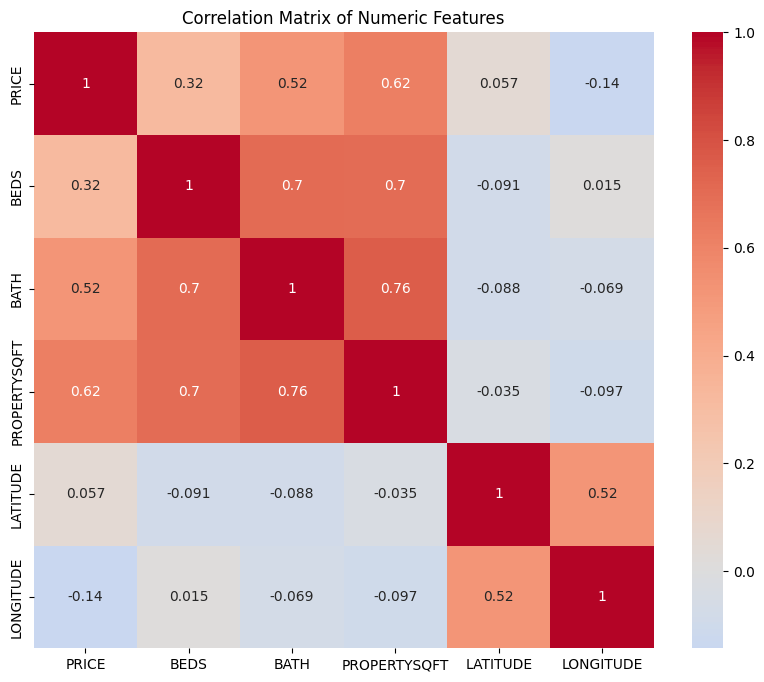

In [13]:
# Visualization 1: Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['PRICE'].dropna(), bins=50)
plt.title('Distribution of Property Prices')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()

# Visualization 2: Property Type Distribution
plt.figure(figsize=(10, 6))
df['TYPE'].value_counts().plot(kind='bar')
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualization 3: Price by Borough
plt.figure(figsize=(12, 6))
sns.boxplot(x='LOCALITY', y='PRICE', data=df)
plt.title('Price Distribution by Borough')
plt.xlabel('Borough')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

# Correlation matrix
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [14]:
# Select features and target
features = ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']
categorical_features = ['TYPE', 'LOCALITY']
target = 'PRICE'

# Handle missing values
df = df.dropna(subset=[target] + features)

# Encode categorical variables
le = LabelEncoder()
for cat in categorical_features:
    df[cat] = le.fit_transform(df[cat].astype(str))

# Prepare X and y
X = df[features + categorical_features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessed and split successfully!")
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Data preprocessed and split successfully!
Training set shape: (2396, 7)
Test set shape: (599, 7)


<ipython-input-14-566c181f3adb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat] = le.fit_transform(df[cat].astype(str))
<ipython-input-14-566c181f3adb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat] = le.fit_transform(df[cat].astype(str))


Linear Regression Results:
Mean Squared Error: 1,332,431,853,721.46
R² Score: 0.4305


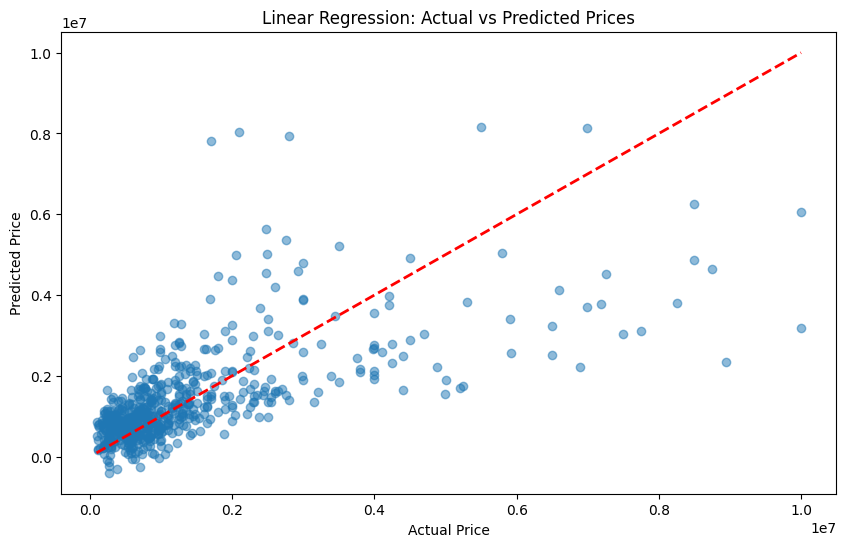

In [15]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

# Evaluate
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print("Linear Regression Results:")
print(f"Mean Squared Error: {lr_mse:,.2f}")
print(f"R² Score: {lr_r2:.4f}")

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.show()

Gradient Boosting Results:
Mean Squared Error: 443,972,934,251.88
R² Score: 0.8102


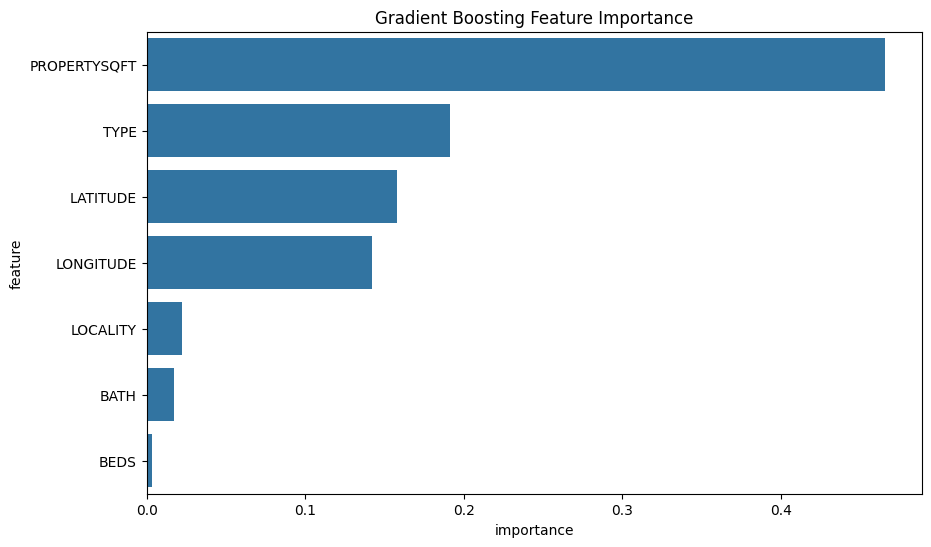

In [16]:
# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_pred = gb_model.predict(X_test_scaled)

# Evaluate
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

print("Gradient Boosting Results:")
print(f"Mean Squared Error: {gb_mse:,.2f}")
print(f"R² Score: {gb_r2:.4f}")

# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': gb_model.feature_importances_})
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.sort_values('importance', ascending=False))
plt.title('Gradient Boosting Feature Importance')
plt.show()

XGBoost Results:
Mean Squared Error: 367,524,708,352.00
R² Score: 0.8429


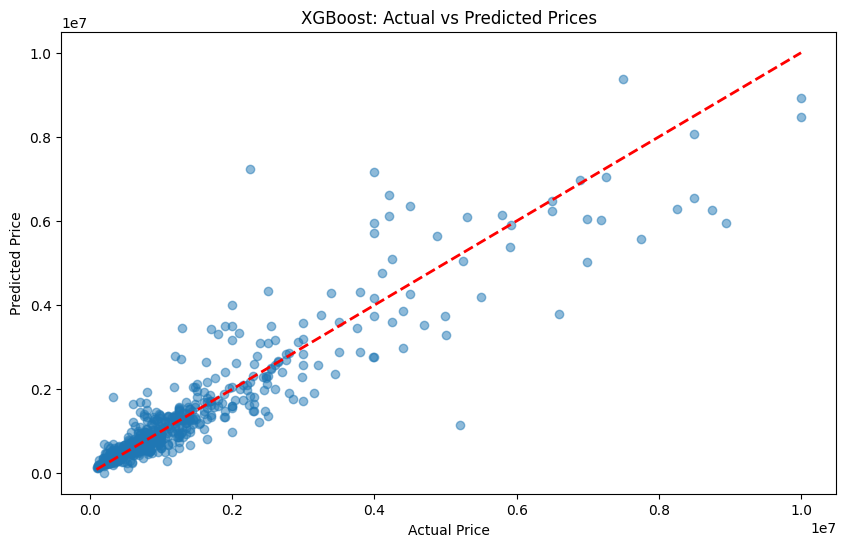

In [17]:
# XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)

# Evaluate
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

print("XGBoost Results:")
print(f"Mean Squared Error: {xgb_mse:,.2f}")
print(f"R² Score: {xgb_r2:.4f}")

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('XGBoost: Actual vs Predicted Prices')
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
TensorFlow Neural Network Results:
Mean Squared Error: 1,353,928,802,304.00
R² Score: 0.4213


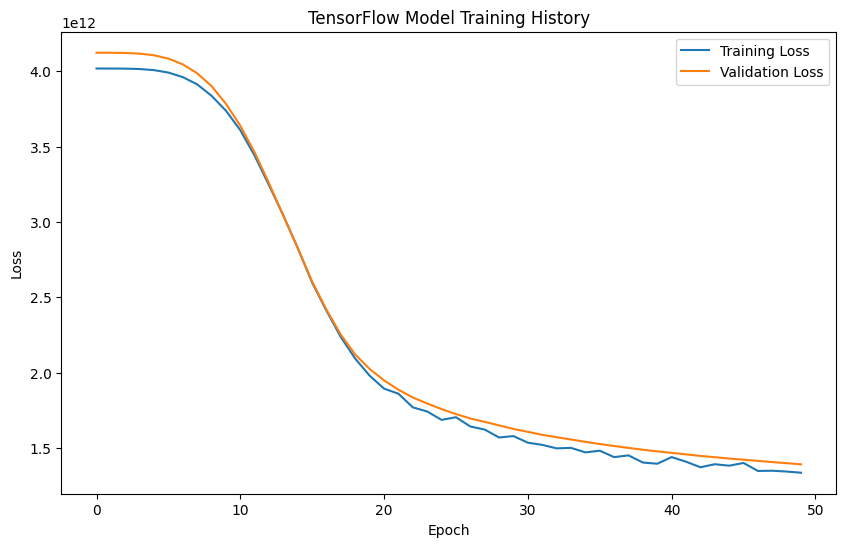

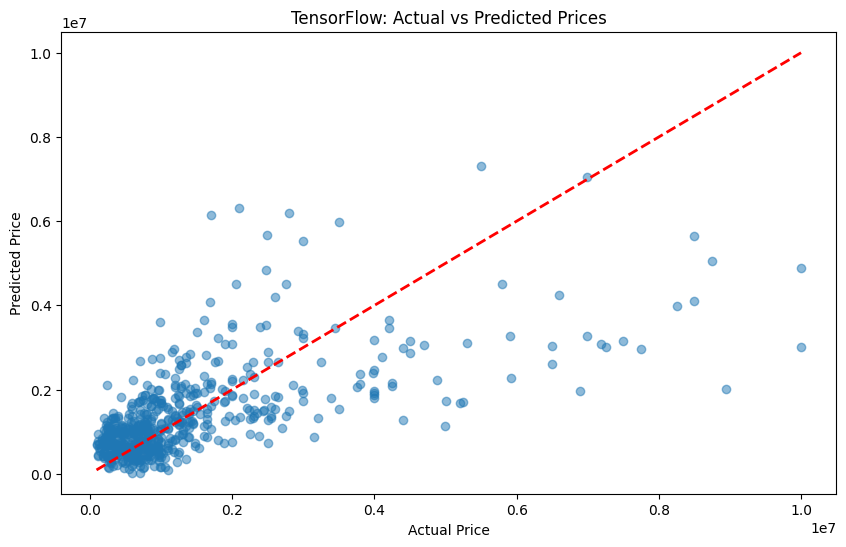

In [18]:
# Define TensorFlow model
tf_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compile model
tf_model.compile(optimizer='adam', loss='mse')

# Train model
history = tf_model.fit(X_train_scaled, y_train,
                      epochs=50,
                      batch_size=32,
                      validation_split=0.2,
                      verbose=0)

# Predict
tf_pred = tf_model.predict(X_test_scaled).flatten()

# Evaluate
tf_mse = mean_squared_error(y_test, tf_pred)
tf_r2 = r2_score(y_test, tf_pred)

print("TensorFlow Neural Network Results:")
print(f"Mean Squared Error: {tf_mse:,.2f}")
print(f"R² Score: {tf_r2:.4f}")

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('TensorFlow Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, tf_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('TensorFlow: Actual vs Predicted Prices')
plt.show()

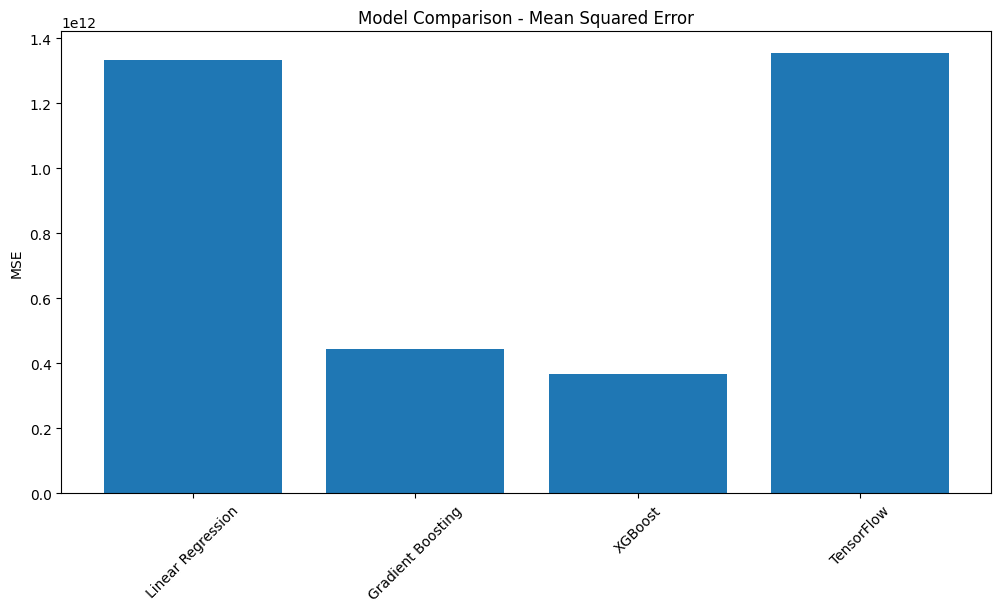

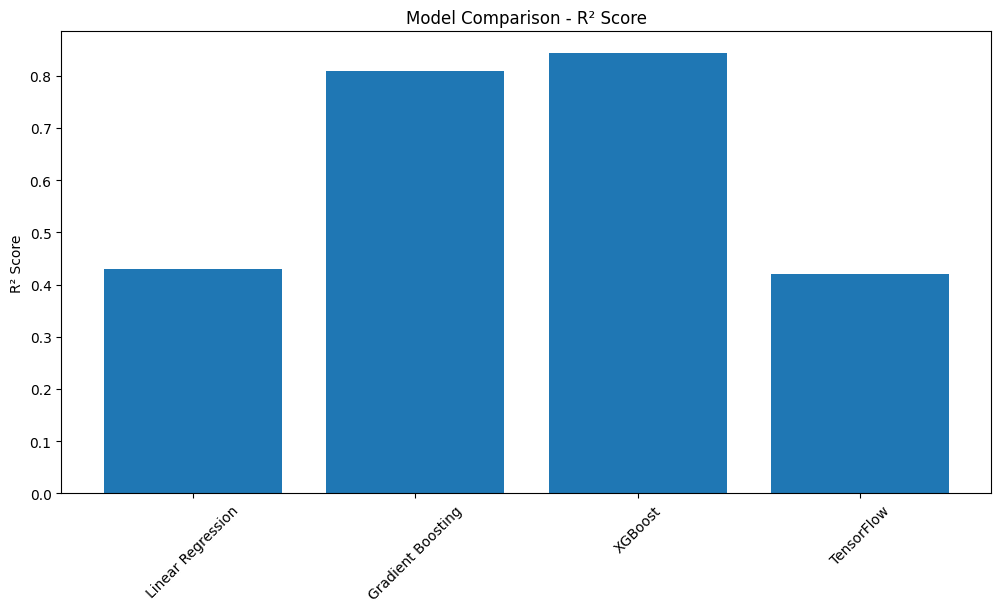

In [19]:
# Compare all models
models = ['Linear Regression', 'Gradient Boosting', 'XGBoost', 'TensorFlow']
mses = [lr_mse, gb_mse, xgb_mse, tf_mse]
r2s = [lr_r2, gb_r2, xgb_r2, tf_r2]

plt.figure(figsize=(12, 6))
plt.bar(models, mses)
plt.title('Model Comparison - Mean Squared Error')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(models, r2s)
plt.title('Model Comparison - R² Score')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Handle outliers in PRICE
Q1 = df['PRICE'].quantile(0.25)
Q3 = df['PRICE'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['PRICE'] < (Q1 - 1.5 * IQR)) | (df['PRICE'] > (Q3 + 1.5 * IQR)))]

# Create new features
df['PRICE_PER_SQFT'] = df['PRICE'] / df['PROPERTYSQFT']
df['BED_BATH_RATIO'] = df['BEDS'] / df['BATH'].replace(0, 1)  # Avoid division by zero

# Log transform the target variable to handle skewness
df['LOG_PRICE'] = np.log1p(df['PRICE'])

# Update features list with new engineered features
features.extend(['PRICE_PER_SQFT', 'BED_BATH_RATIO'])

print("Advanced cleaning and feature engineering completed!")
print("New features added:", ['PRICE_PER_SQFT', 'BED_BATH_RATIO'])
print(df[['PRICE', 'PRICE_PER_SQFT', 'BED_BATH_RATIO', 'LOG_PRICE']].head())

Advanced cleaning and feature engineering completed!
New features added: ['PRICE_PER_SQFT', 'BED_BATH_RATIO']
    PRICE  PRICE_PER_SQFT  BED_BATH_RATIO  LOG_PRICE
0  315000      225.000000             1.0  12.660331
1  260000      129.032258             2.0  12.468441
2   69000      155.056180             3.0  11.141876
3  690000      172.327672             2.5  13.444448
5  265000      353.333333             1.0  12.487489


<ipython-input-20-0c5044812e8d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PRICE_PER_SQFT'] = df['PRICE'] / df['PROPERTYSQFT']
<ipython-input-20-0c5044812e8d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BED_BATH_RATIO'] = df['BEDS'] / df['BATH'].replace(0, 1)  # Avoid division by zero
<ipython-input-20-0c5044812e8d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

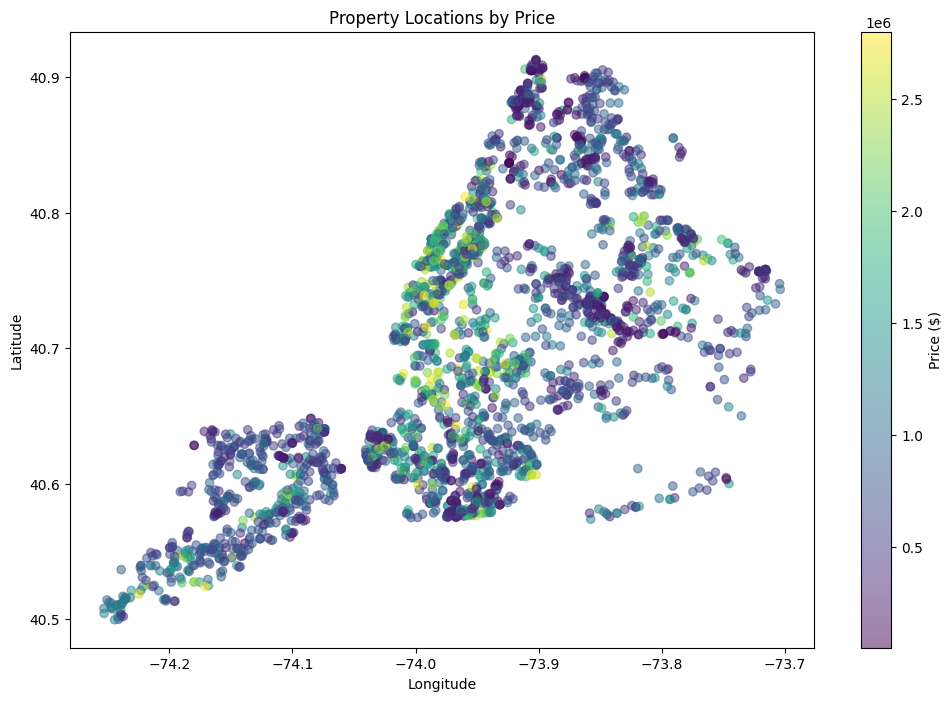

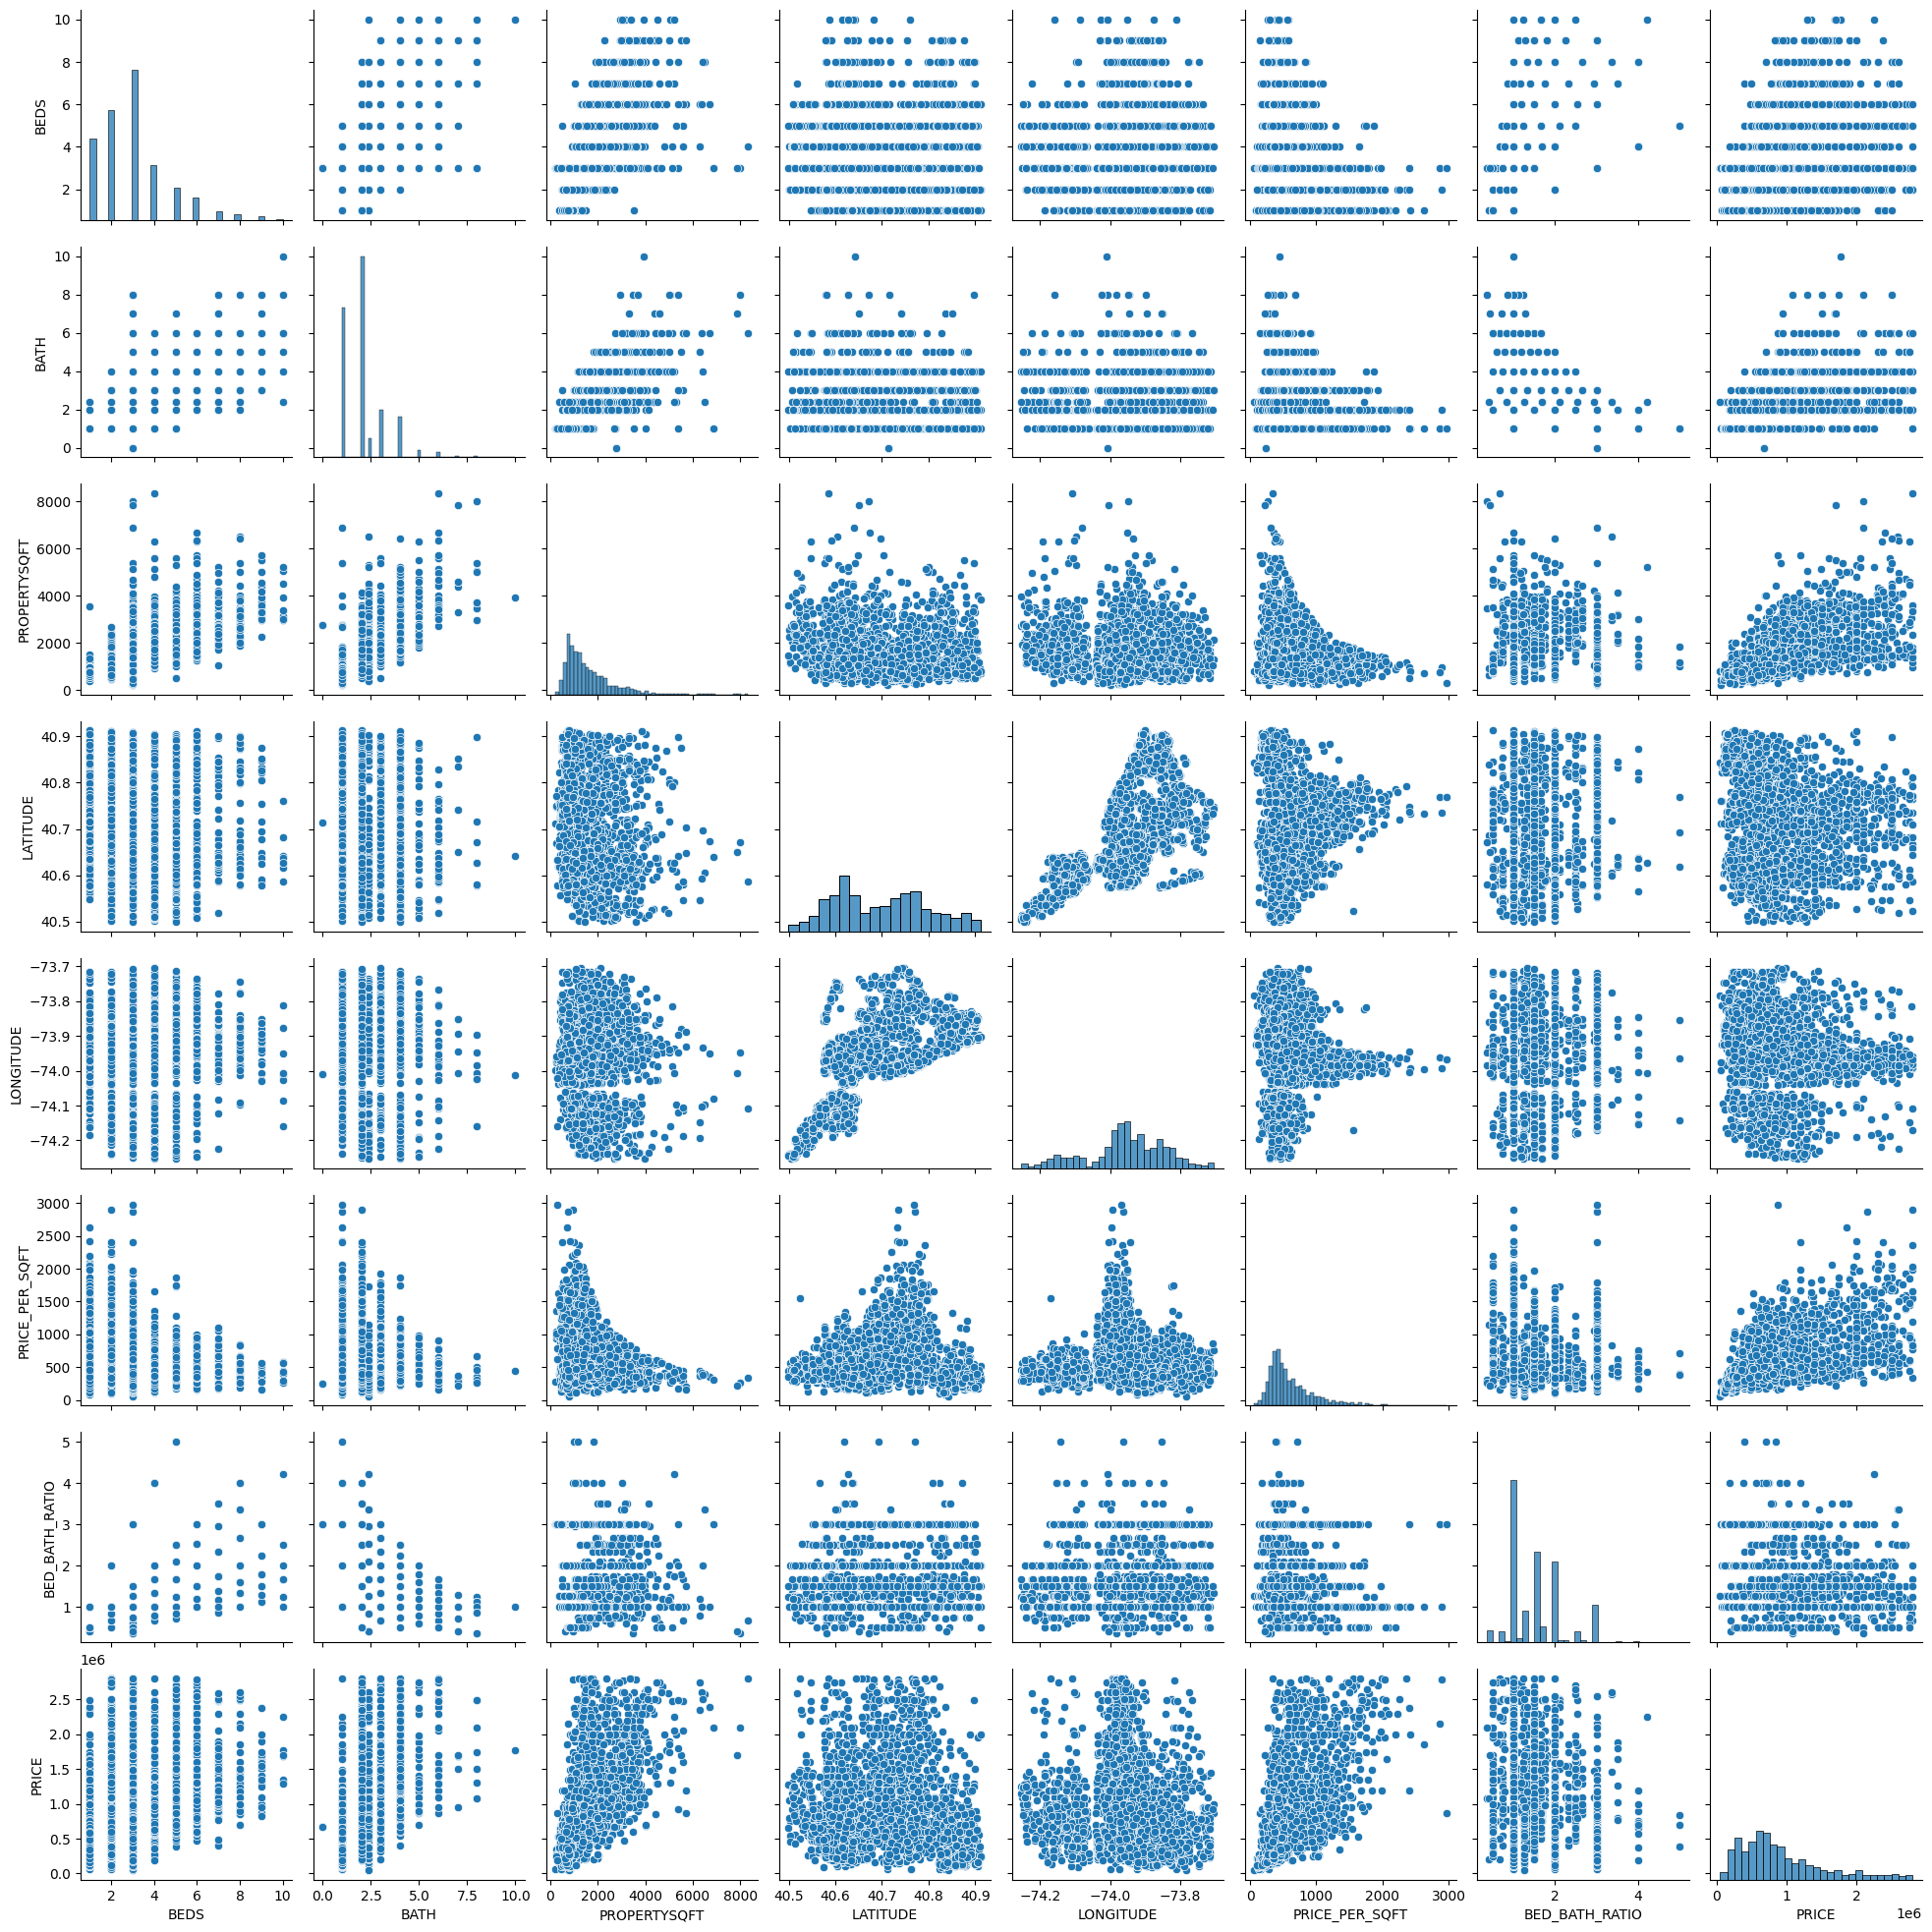

Geographic and pairplot visualizations generated!


In [21]:
# Scatter plot of properties by location and price
plt.figure(figsize=(12, 8))
plt.scatter(df['LONGITUDE'], df['LATITUDE'], c=df['PRICE'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Price ($)')
plt.title('Property Locations by Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Pairplot for numeric features
sns.pairplot(df[features + [target]].dropna())
plt.show()

print("Geographic and pairplot visualizations generated!")

Random Forest Results:
Mean Squared Error: 415,720,592,171.69
R² Score: 0.8223


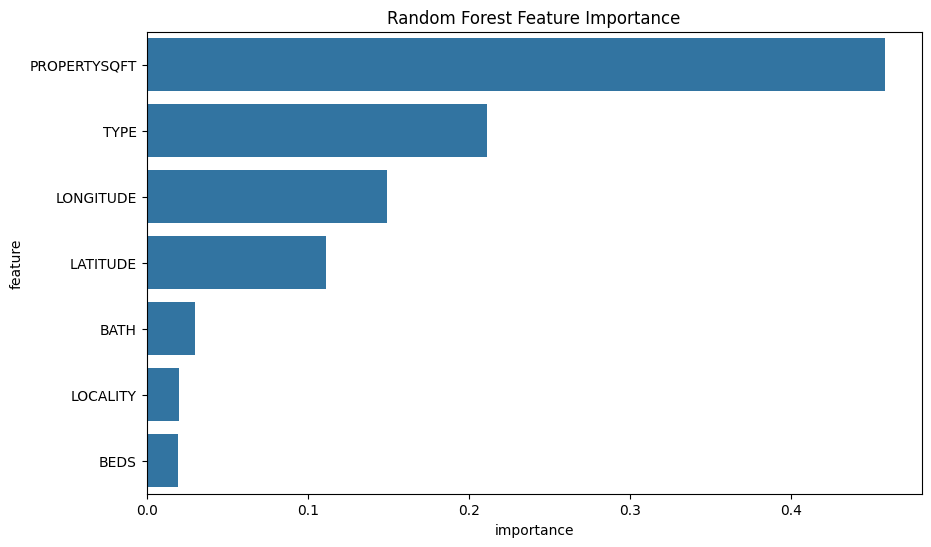

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

# Evaluate
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Results:")
print(f"Mean Squared Error: {rf_mse:,.2f}")
print(f"R² Score: {rf_r2:.4f}")

# Feature importance
feature_importance_rf = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_rf.sort_values('importance', ascending=False))
plt.title('Random Forest Feature Importance')
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Grid Search
gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
gb_grid.fit(X_train_scaled, y_train)

# Best model predictions
best_gb_pred = gb_grid.best_estimator_.predict(X_test_scaled)

# Evaluate
best_gb_mse = mean_squared_error(y_test, best_gb_pred)
best_gb_r2 = r2_score(y_test, best_gb_pred)

print("Tuned Gradient Boosting Results:")
print(f"Best Parameters: {gb_grid.best_params_}")
print(f"Mean Squared Error: {best_gb_mse:,.2f}")
print(f"R² Score: {best_gb_r2:.4f}")

Tuned Gradient Boosting Results:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Mean Squared Error: 358,849,767,518.48
R² Score: 0.8466


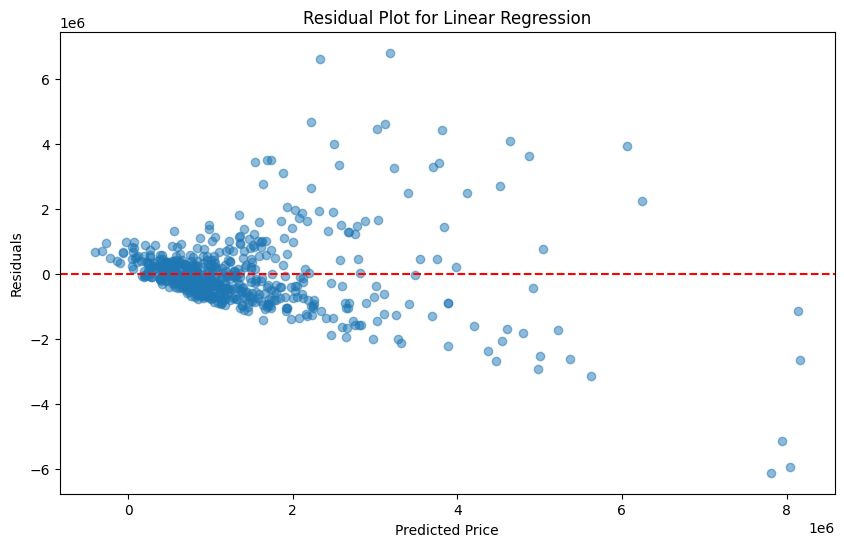

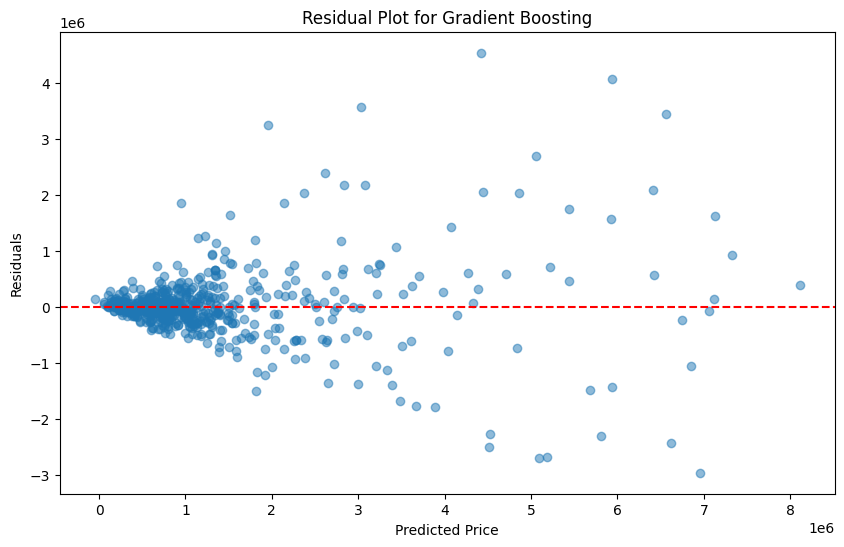

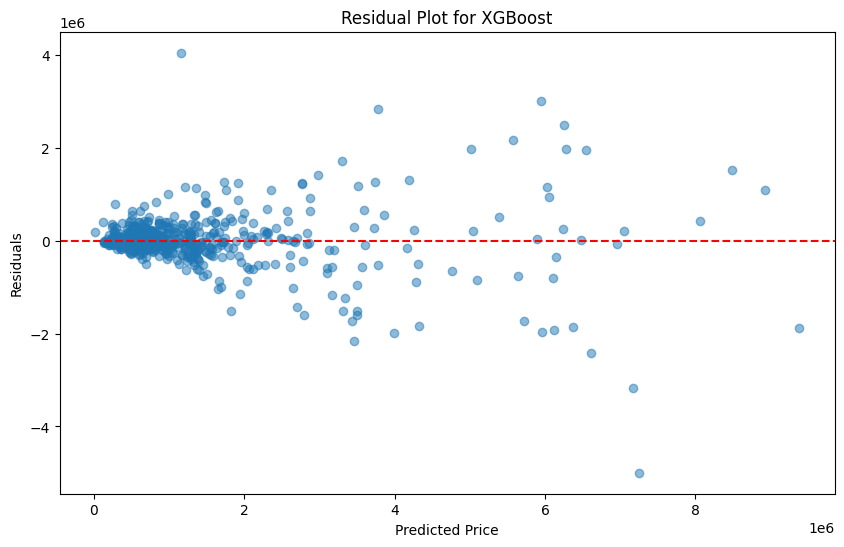

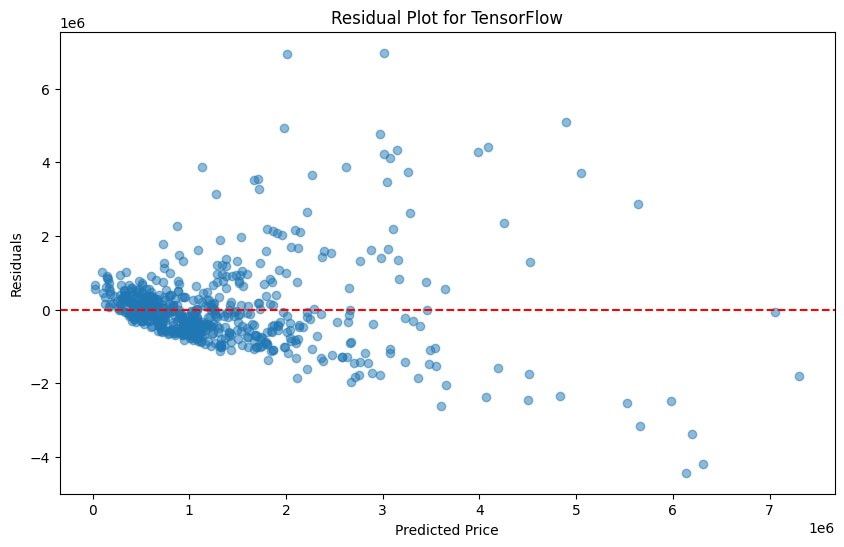

In [25]:
# Function to plot residuals
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Residual Plot for {model_name}')
    plt.xlabel('Predicted Price')
    plt.ylabel('Residuals')
    plt.show()

# Plot residuals for all models
plot_residuals(y_test, lr_pred, 'Linear Regression')
plot_residuals(y_test, gb_pred, 'Gradient Boosting')
plot_residuals(y_test, xgb_pred, 'XGBoost')
plot_residuals(y_test, tf_pred, 'TensorFlow')

Allows users to input new property details and get a price prediction.

In [27]:
# Function to predict price for a new property
def predict_price(beds, bath, sqft, latitude, longitude, property_type, locality, model=xgb_model):
    # Create input dataframe
    input_data = pd.DataFrame({
        'BEDS': [beds],
        'BATH': [bath],
        'PROPERTYSQFT': [sqft],
        'LATITUDE': [latitude],
        'LONGITUDE': [longitude],
        'TYPE': [le.fit_transform([property_type])[0]],
        'LOCALITY': [le.fit_transform([locality])[0]]
    })

    # Scale input
    input_scaled = scaler.transform(input_data)

    # Predict
    predicted_price = model.predict(input_scaled)[0]
    return predicted_price

# Example usage
example_price = predict_price(
    beds=2,
    bath=2,
    sqft=1000,
    latitude=40.761255,
    longitude=-73.9744834,
    property_type='Condo for sale',
    locality='Manhattan'
)
print(f"Predicted Price for example property: ${example_price:,.2f}")

Predicted Price for example property: $1,128,693.12


saves models and scalers which are trained

In [28]:
import joblib

# Save models
joblib.dump(lr_model, 'linear_regression_model.pkl')
joblib.dump(gb_model, 'gradient_boosting_model.pkl')
joblib.dump(xgb_model, 'xgboost_model.pkl')
tf_model.save('tensorflow_model.h5')
joblib.dump(scaler, 'scaler.pkl')

print("Models and scaler saved successfully!")

# Example of loading a model
loaded_xgb = joblib.load('xgboost_model.pkl')
loaded_pred = loaded_xgb.predict(X_test_scaled)
print("Loaded XGBoost MSE:", mean_squared_error(y_test, loaded_pred))

Models and scaler saved successfully!
Loaded XGBoost MSE: 367524708352.0


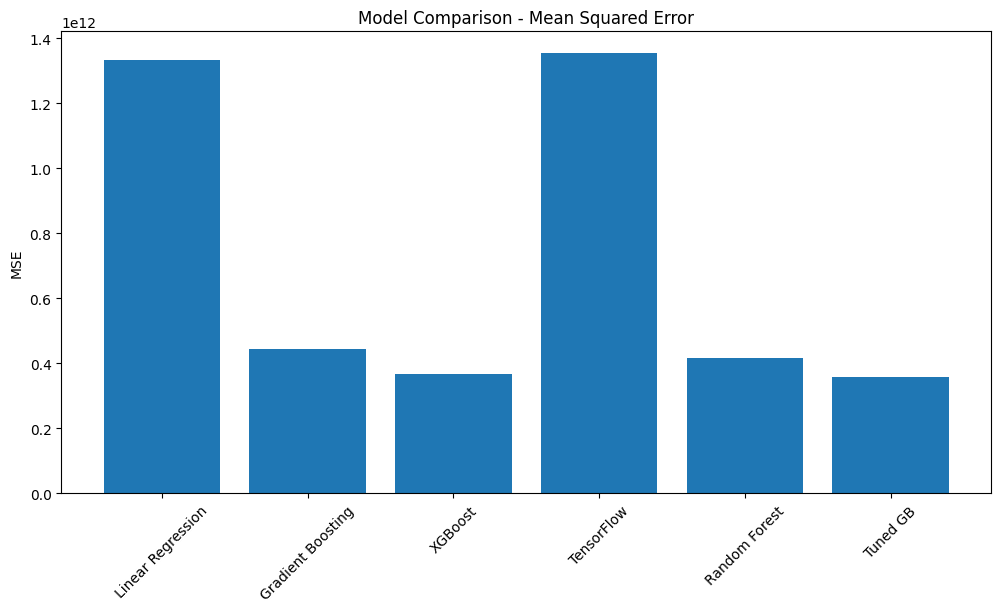

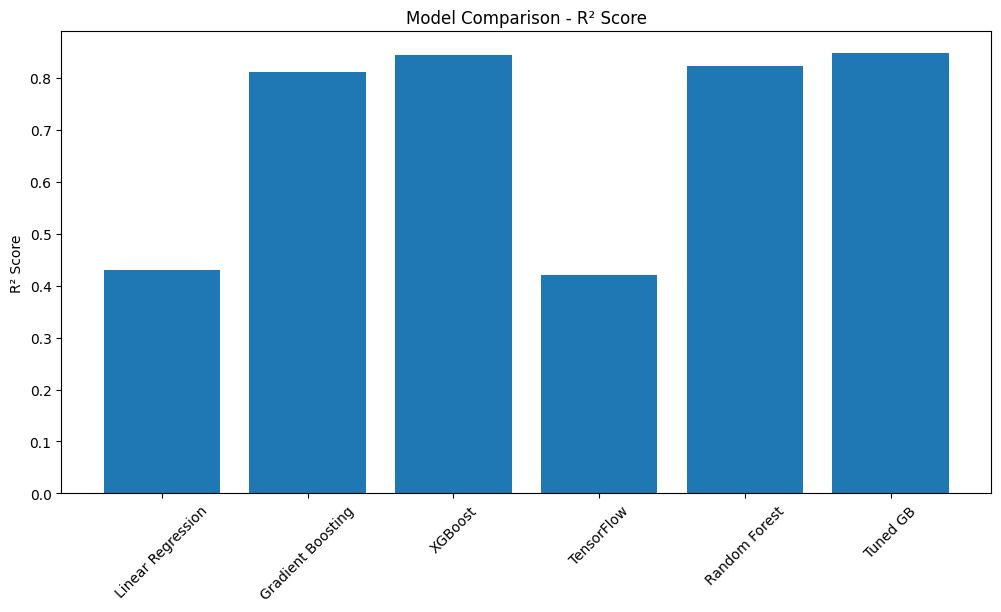

In [29]:
# Compare all models
models = ['Linear Regression', 'Gradient Boosting', 'XGBoost', 'TensorFlow', 'Random Forest', 'Tuned GB']
mses = [lr_mse, gb_mse, xgb_mse, tf_mse, rf_mse, best_gb_mse]
r2s = [lr_r2, gb_r2, xgb_r2, tf_r2, rf_r2, best_gb_r2]

plt.figure(figsize=(12, 6))
plt.bar(models, mses)
plt.title('Model Comparison - Mean Squared Error')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(models, r2s)
plt.title('Model Comparison - R² Score')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.show()

MAE, MAPE FOR EVAULATION **METRICS**


Linear Regression Evaluation:
Mean Absolute Error (MAE): $724,271.24
Median Absolute Error (MedAE): $441,188.45
Mean Absolute Percentage Error (MAPE): 78.56%

Gradient Boosting Evaluation:
Mean Absolute Error (MAE): $358,297.75
Median Absolute Error (MedAE): $159,469.49
Mean Absolute Percentage Error (MAPE): 29.44%

XGBoost Evaluation:
Mean Absolute Error (MAE): $321,655.81
Median Absolute Error (MedAE): $145,053.62
Mean Absolute Percentage Error (MAPE): 26.64%

TensorFlow Evaluation:
Mean Absolute Error (MAE): $733,369.50
Median Absolute Error (MedAE): $460,769.88
Mean Absolute Percentage Error (MAPE): 81.28%

Random Forest Evaluation:
Mean Absolute Error (MAE): $339,717.35
Median Absolute Error (MedAE): $143,091.00
Mean Absolute Percentage Error (MAPE): 27.20%

Tuned GB Evaluation:
Mean Absolute Error (MAE): $312,525.78
Median Absolute Error (MedAE): $137,143.74
Mean Absolute Percentage Error (MAPE): 25.87%


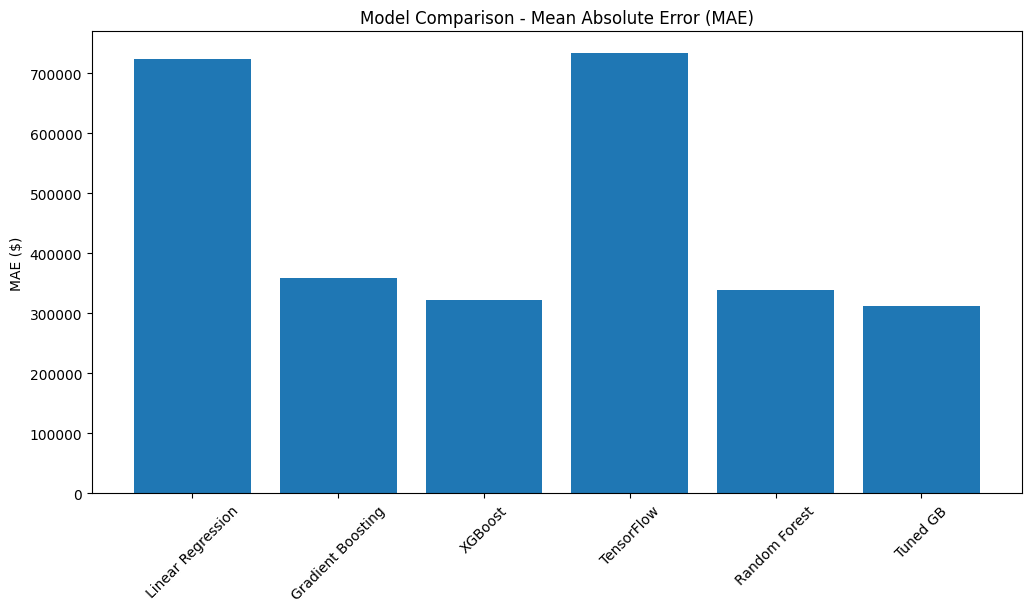

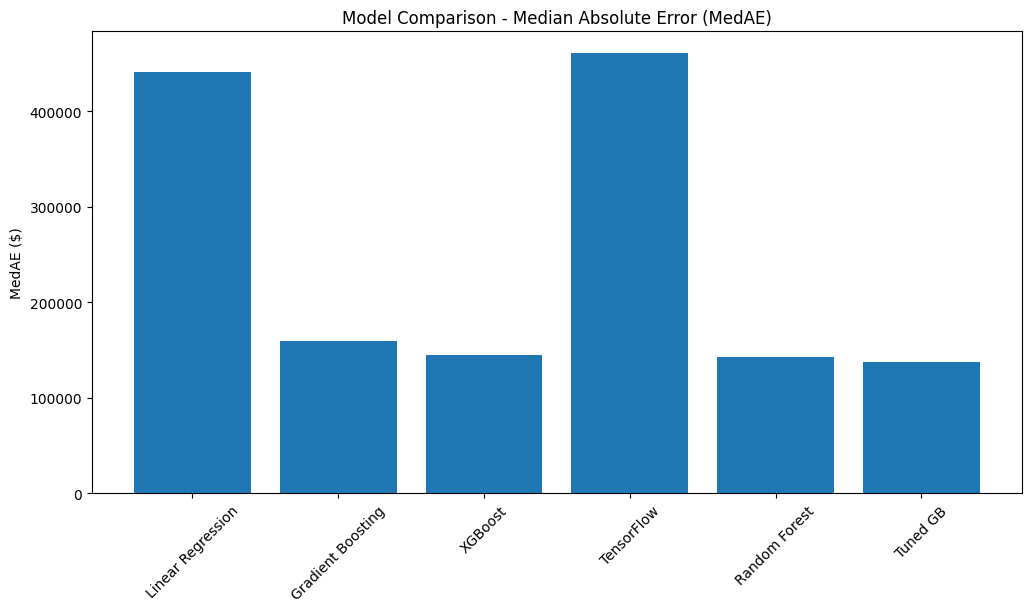

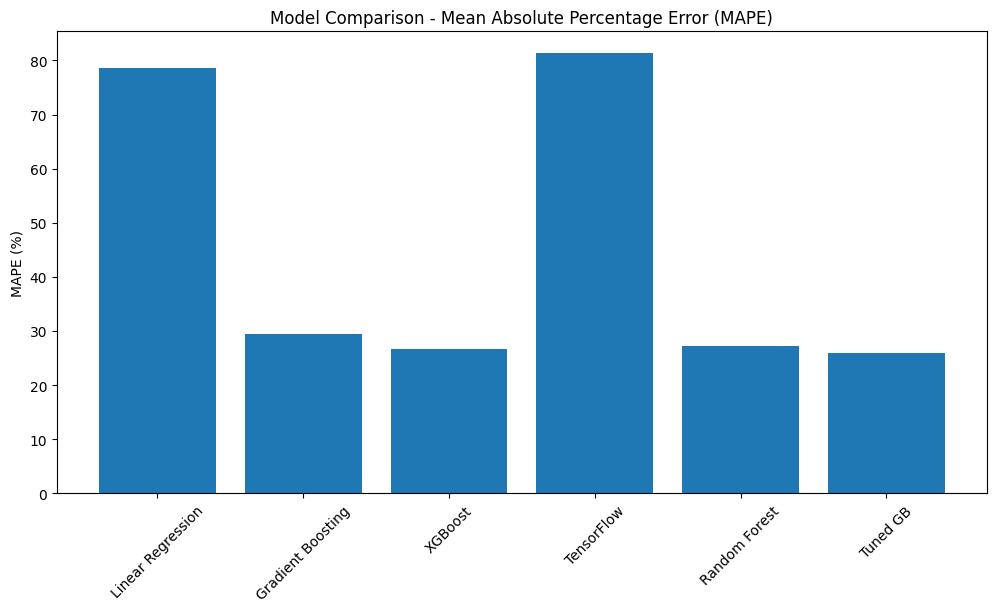

In [30]:
from sklearn.metrics import mean_absolute_error, median_absolute_error

# Function to calculate additional metrics
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # MAPE in percentage

    print(f"\n{model_name} Evaluation:")
    print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
    print(f"Median Absolute Error (MedAE): ${medae:,.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    return mae, medae, mape

# Evaluate all models
models = {
    'Linear Regression': lr_pred,
    'Gradient Boosting': gb_pred,
    'XGBoost': xgb_pred,
    'TensorFlow': tf_pred,
    'Random Forest': rf_pred,
    'Tuned GB': best_gb_pred
}

# Store results for comparison
mae_results = []
medae_results = []
mape_results = []
model_names = []

for model_name, predictions in models.items():
    mae, medae, mape = evaluate_model(y_test, predictions, model_name)
    model_names.append(model_name)
    mae_results.append(mae)
    medae_results.append(medae)
    mape_results.append(mape)

# Plot comparisons
plt.figure(figsize=(12, 6))
plt.bar(model_names, mae_results)
plt.title('Model Comparison - Mean Absolute Error (MAE)')
plt.ylabel('MAE ($)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(model_names, medae_results)
plt.title('Model Comparison - Median Absolute Error (MedAE)')
plt.ylabel('MedAE ($)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(model_names, mape_results)
plt.title('Model Comparison - Mean Absolute Percentage Error (MAPE)')
plt.ylabel('MAPE (%)')
plt.xticks(rotation=45)
plt.show()

CROSS VALIDATION FOR ROBUSTNESS


Cross-Validation Results for LinearRegression:
Average MSE: 1,226,334,107,696.23 (+/- 205,247,833,463.77)
Average MAE: 689,530.58 (+/- 31,280.80)
Average R²: 0.4637 (+/- 0.0318)

Cross-Validation Results for GradientBoostingRegressor:
Average MSE: 532,983,506,181.27 (+/- 92,003,147,326.41)
Average MAE: 373,435.28 (+/- 28,761.12)
Average R²: 0.7665 (+/- 0.0253)

Cross-Validation Results for XGBRegressor:
Average MSE: 520,160,627,916.80 (+/- 94,406,784,580.20)
Average MAE: 358,102.24 (+/- 28,602.23)
Average R²: 0.7725 (+/- 0.0265)

Cross-Validation Results for RandomForestRegressor:
Average MSE: 502,287,378,108.07 (+/- 96,152,618,822.81)
Average MAE: 353,940.30 (+/- 22,944.58)
Average R²: 0.7814 (+/- 0.0159)

Cross-Validation Results for GradientBoostingRegressor:
Average MSE: 535,460,800,945.28 (+/- 101,947,246,659.11)
Average MAE: 354,252.91 (+/- 26,024.07)
Average R²: 0.7653 (+/- 0.0348)


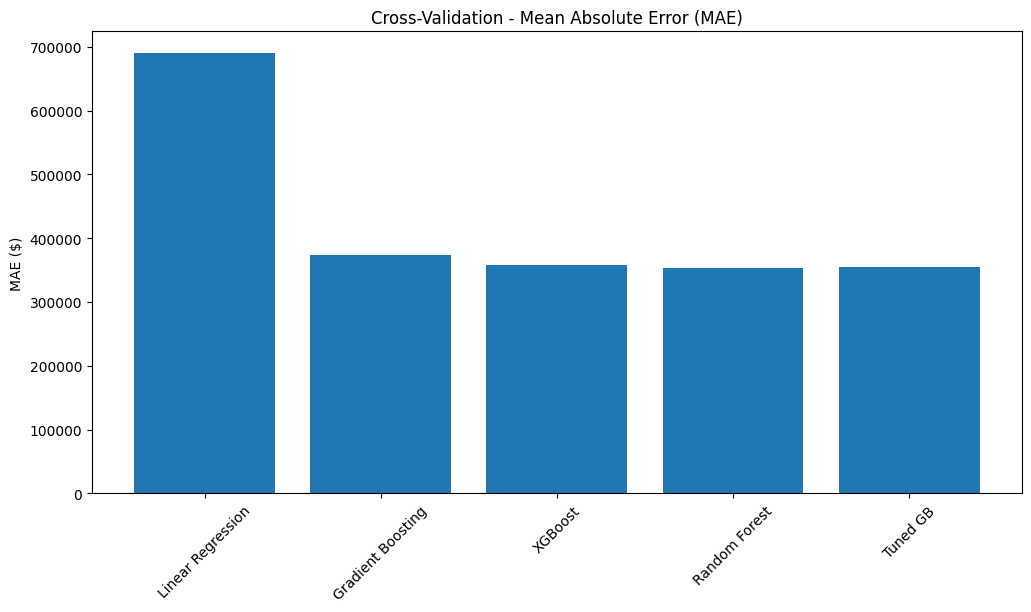

In [31]:
from sklearn.model_selection import cross_val_score, KFold

# Function to perform cross-validation
def cross_validate_model(model, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

    print(f"\nCross-Validation Results for {model.__class__.__name__}:")
    print(f"Average MSE: {mse_scores.mean():,.2f} (+/- {mse_scores.std():,.2f})")
    print(f"Average MAE: {mae_scores.mean():,.2f} (+/- {mae_scores.std():,.2f})")
    print(f"Average R²: {r2_scores.mean():.4f} (+/- {r2_scores.std():.4f})")
    return mse_scores.mean(), mae_scores.mean(), r2_scores.mean()

# Cross-validate all models
models_to_cv = {
    'Linear Regression': lr_model,
    'Gradient Boosting': gb_model,
    'XGBoost': xgb_model,
    'Random Forest': rf_model,
    'Tuned GB': gb_grid.best_estimator_
}

cv_mse_results = []
cv_mae_results = []
cv_r2_results = []
cv_model_names = []

for model_name, model in models_to_cv.items():
    mse, mae, r2 = cross_validate_model(model, X_train_scaled, y_train)
    cv_model_names.append(model_name)
    cv_mse_results.append(mse)
    cv_mae_results.append(mae)
    cv_r2_results.append(r2)

# Plot cross-validation results
plt.figure(figsize=(12, 6))
plt.bar(cv_model_names, cv_mae_results)
plt.title('Cross-Validation - Mean Absolute Error (MAE)')
plt.ylabel('MAE ($)')
plt.xticks(rotation=45)
plt.show()

## Error Analysis by Price Range


Linear Regression Error by Price Range:
   Price Range           MAE        MAPE
0         High  1.537746e+06   46.358814
1  Medium-High  5.205359e+05   47.155230
2   Medium-Low  3.994216e+05   58.468475
3          Low  4.401739e+05  161.156195


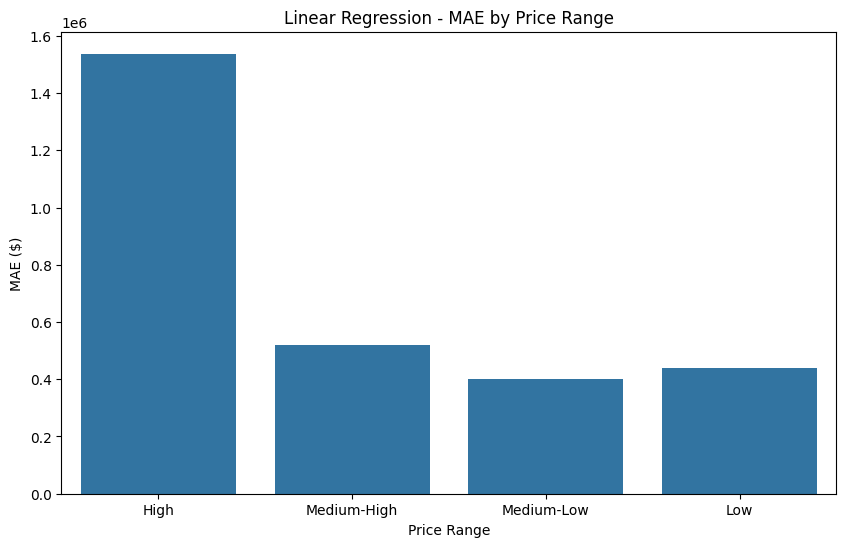


Gradient Boosting Error by Price Range:
   Price Range            MAE       MAPE
0         High  884947.663570  27.732036
1  Medium-High  233386.232432  20.130027
2   Medium-Low  183032.454083  26.439297
3          Low  132336.956968  43.172881


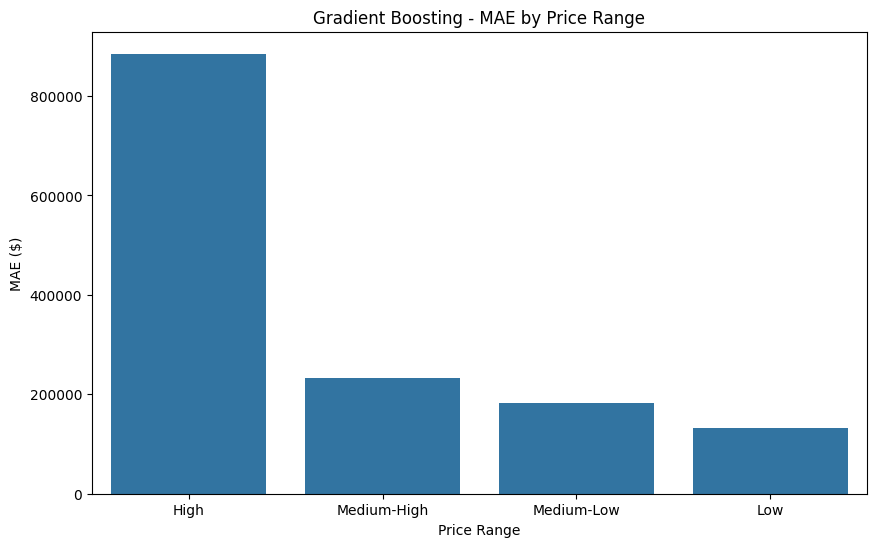


XGBoost Error by Price Range:
   Price Range            MAE       MAPE
0         High  760772.250000  24.267728
1  Medium-High  253258.468750  22.320901
2   Medium-Low  172099.421875  24.595212
3          Low  102126.820312  35.220440


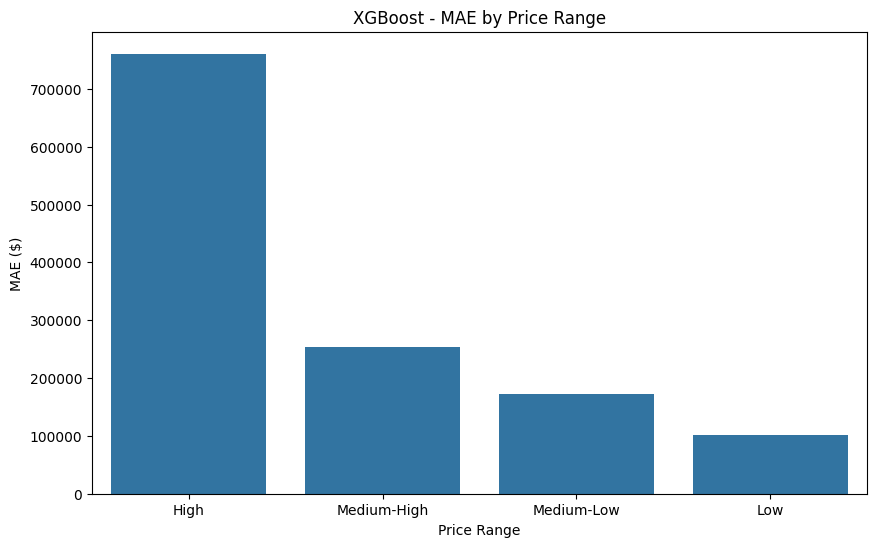


TensorFlow Error by Price Range:
   Price Range           MAE        MAPE
0         High  1.547776e+06   44.741467
1  Medium-High  5.483562e+05   49.736568
2   Medium-Low  3.857966e+05   56.072895
3          Low  4.531181e+05  173.446328


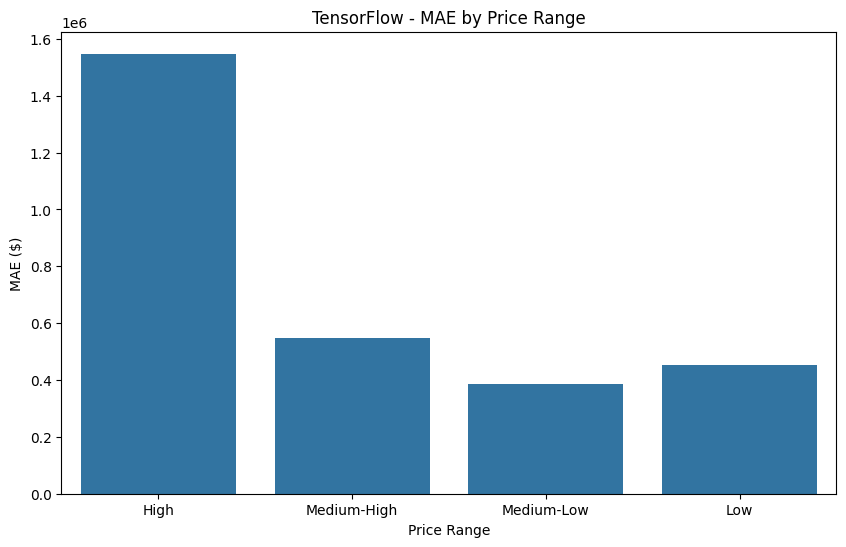


Random Forest Error by Price Range:
   Price Range            MAE       MAPE
0         High  833724.521422  25.902997
1  Medium-High  240823.986507  21.168102
2   Medium-Low  180713.243575  26.016545
3          Low  104657.613778  35.518403


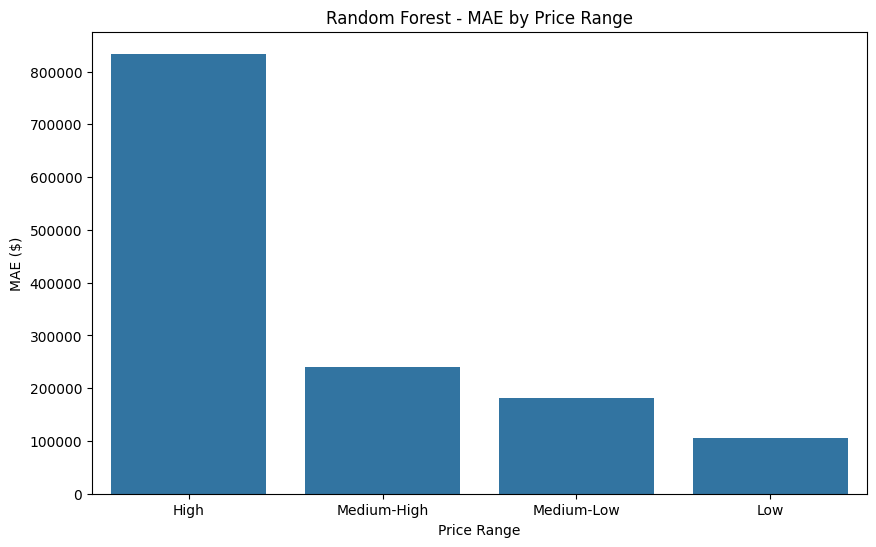


Tuned GB Error by Price Range:
   Price Range            MAE       MAPE
0         High  759817.943547  23.695984
1  Medium-High  216642.124590  18.844960
2   Medium-Low  170287.857912  24.413732
3          Low  104084.404190  36.274812


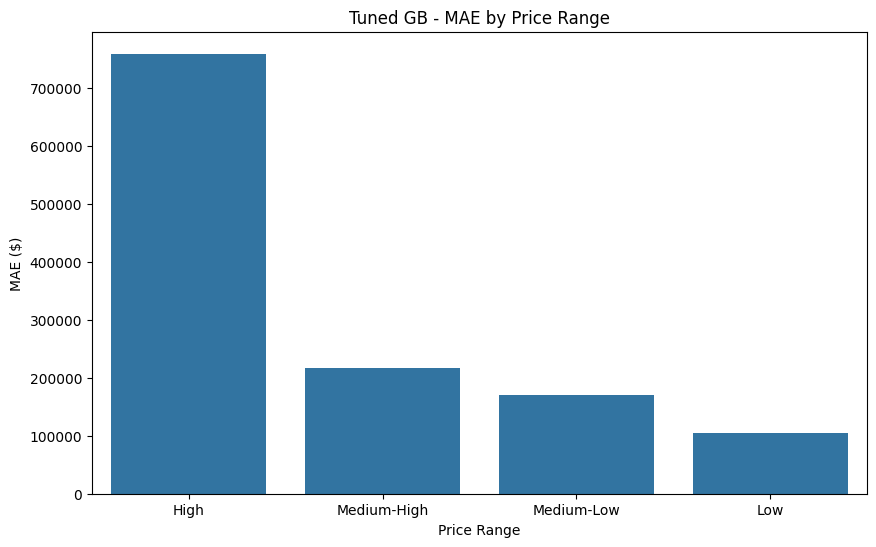

In [32]:
# Bin the test prices into ranges
price_bins = pd.qcut(y_test, q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Function to analyze errors by price range
def error_by_price_range(y_true, y_pred, price_bins, model_name):
    results = []
    for price_range in price_bins.unique():
        mask = price_bins == price_range
        mae = mean_absolute_error(y_true[mask], y_pred[mask])
        mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
        results.append({'Price Range': price_range, 'MAE': mae, 'MAPE': mape})

    results_df = pd.DataFrame(results)
    print(f"\n{model_name} Error by Price Range:")
    print(results_df)

    # Plot MAE by price range
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Price Range', y='MAE', data=results_df)
    plt.title(f'{model_name} - MAE by Price Range')
    plt.ylabel('MAE ($)')
    plt.show()

# Analyze errors for all models
for model_name, predictions in models.items():
    error_by_price_range(y_test, predictions, price_bins, model_name)

## SHAP Values for XGBoosT

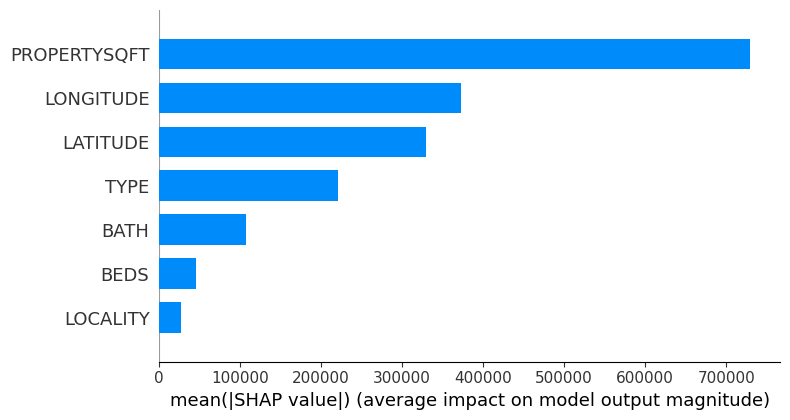

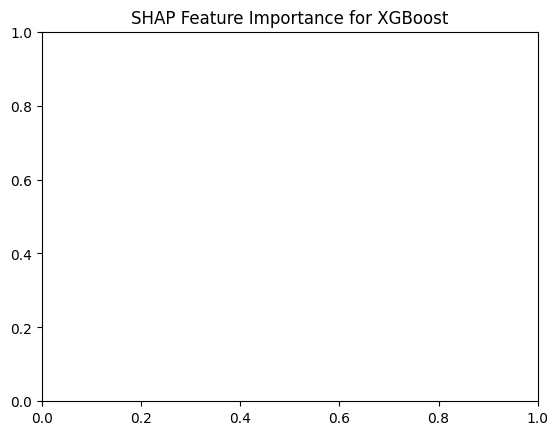

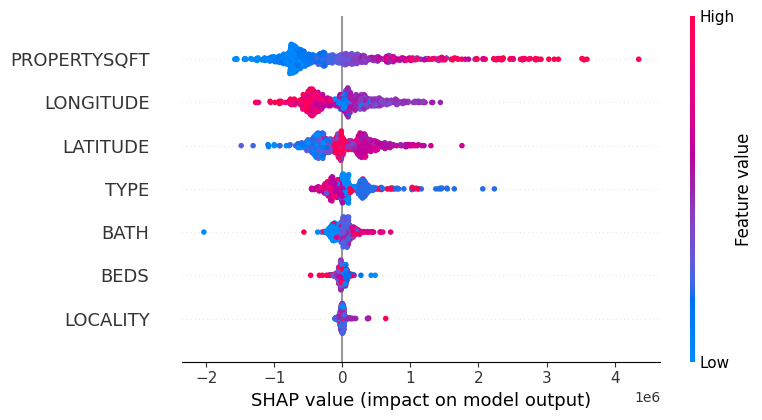

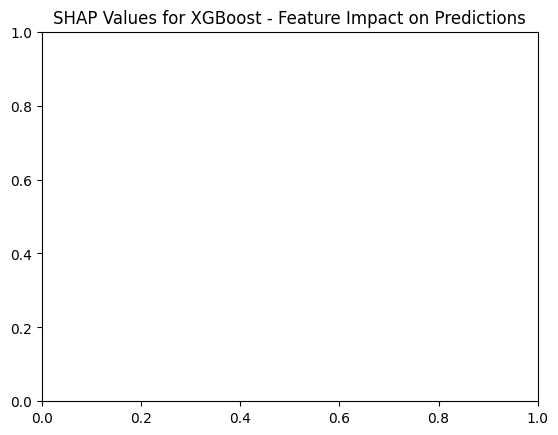

In [33]:
import shap

# Use SHAP to explain XGBoost predictions
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_scaled)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title('SHAP Feature Importance for XGBoost')
plt.show()

# Detailed SHAP summary plot
shap.summary_plot(shap_values, X_test)
plt.title('SHAP Values for XGBoost - Feature Impact on Predictions')
plt.show()

### Ensemble Model


Ensemble Model Evaluation:
Mean Absolute Error (MAE): $310,943.68
Mean Absolute Percentage Error (MAPE): 25.29%
R² Score: 0.8483


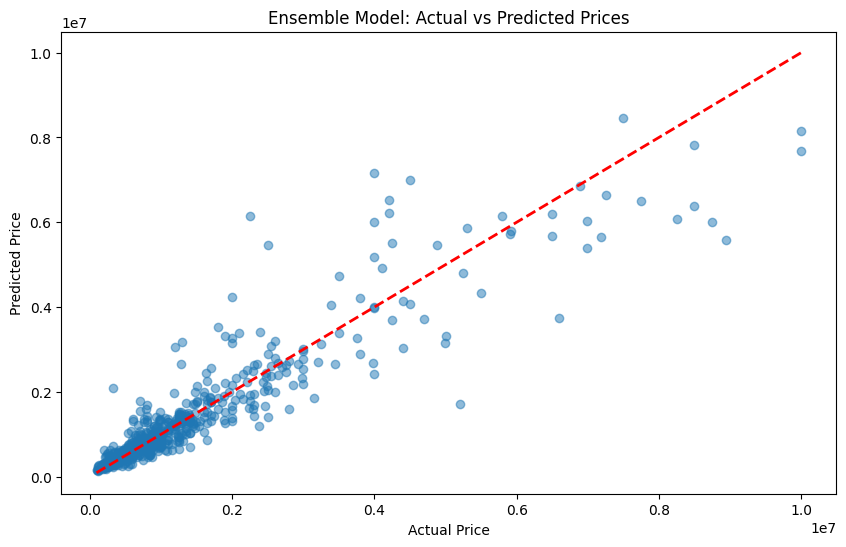

In [34]:
# Ensemble predictions by averaging
ensemble_pred = (xgb_pred + rf_pred + best_gb_pred) / 3

# Evaluate ensemble
ensemble_mae = mean_absolute_error(y_test, ensemble_pred)
ensemble_mape = np.mean(np.abs((y_test - ensemble_pred) / y_test)) * 100
ensemble_r2 = r2_score(y_test, ensemble_pred)

print("\nEnsemble Model Evaluation:")
print(f"Mean Absolute Error (MAE): ${ensemble_mae:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {ensemble_mape:.2f}%")
print(f"R² Score: {ensemble_r2:.4f}")

# Plot ensemble predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ensemble_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Ensemble Model: Actual vs Predicted Prices')
plt.show()

### Prediction Intervals with Gradient Boosting


Prediction Intervals (90% Confidence):
Property 1: Actual: $3,975,000.00, Predicted Range: [$1,024,774.80, $3,628,445.00]
Property 2: Actual: $1,450,000.00, Predicted Range: [$681,141.00, $2,261,425.93]
Property 3: Actual: $995,000.00, Predicted Range: [$601,696.03, $1,939,025.60]
Property 4: Actual: $679,000.00, Predicted Range: [$302,910.74, $1,249,396.46]
Property 5: Actual: $539,000.00, Predicted Range: [$325,936.88, $858,712.54]


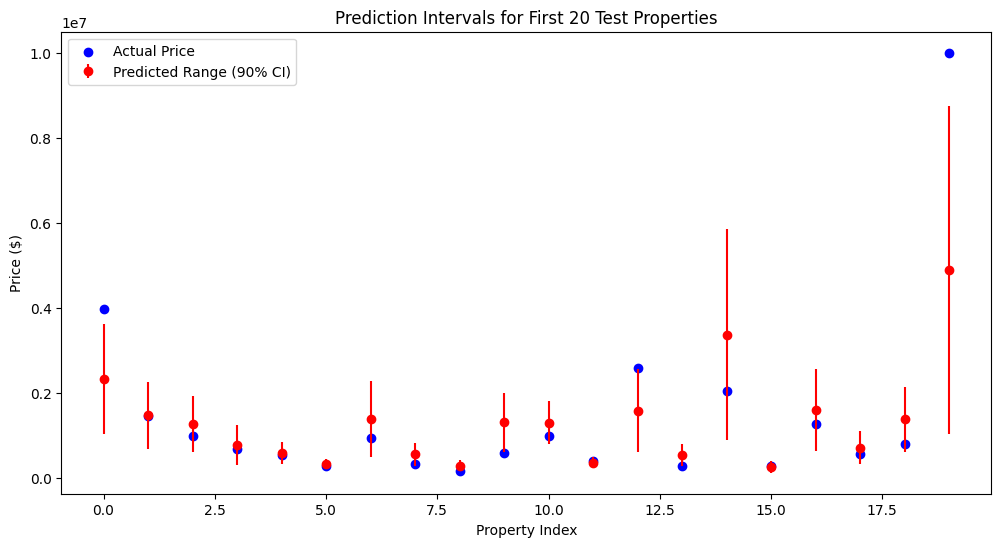

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

# Train quantile models for prediction intervals
lower_model = GradientBoostingRegressor(loss='quantile', alpha=0.05, n_estimators=100, random_state=42)
upper_model = GradientBoostingRegressor(loss='quantile', alpha=0.95, n_estimators=100, random_state=42)

lower_model.fit(X_train_scaled, y_train)
upper_model.fit(X_train_scaled, y_train)

# Predict intervals
lower_pred = lower_model.predict(X_test_scaled)
upper_pred = upper_model.predict(X_test_scaled)

# Evaluate
print("\nPrediction Intervals (90% Confidence):")
for i in range(5):
    print(f"Property {i+1}: Actual: ${y_test.iloc[i]:,.2f}, Predicted Range: [${lower_pred[i]:,.2f}, ${upper_pred[i]:,.2f}]")

# Plot prediction intervals
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test[:20])), y_test[:20], color='blue', label='Actual Price')
plt.errorbar(range(len(y_test[:20])), (lower_pred[:20] + upper_pred[:20]) / 2,
             yerr=[((upper_pred[:20] - lower_pred[:20]) / 2), ((upper_pred[:20] - lower_pred[:20]) / 2)],
             fmt='o', color='red', label='Predicted Range (90% CI)')
plt.title('Prediction Intervals for First 20 Test Properties')
plt.xlabel('Property Index')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

### Updated Model Comparison with New Metrics

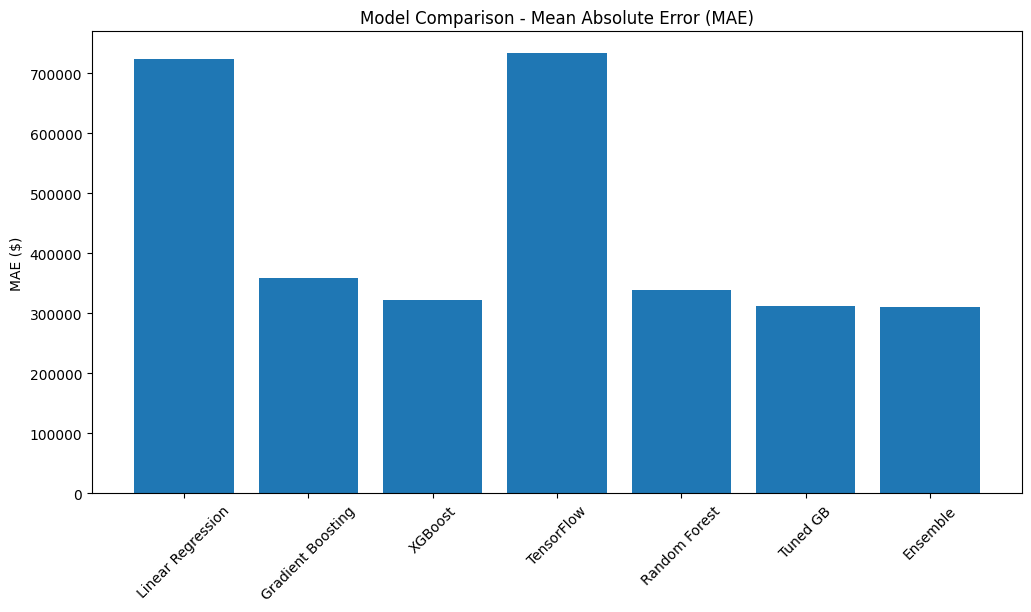

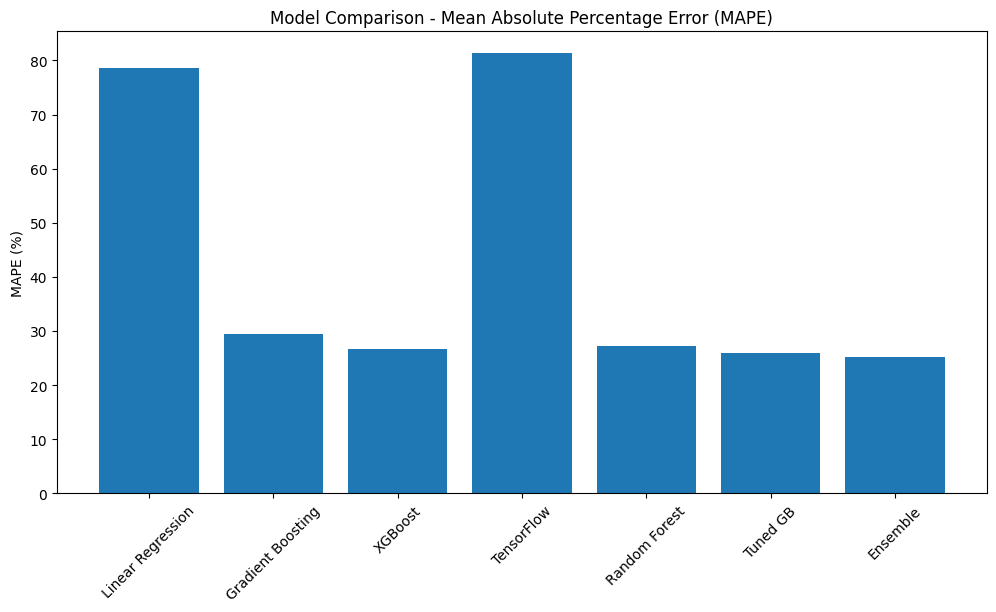

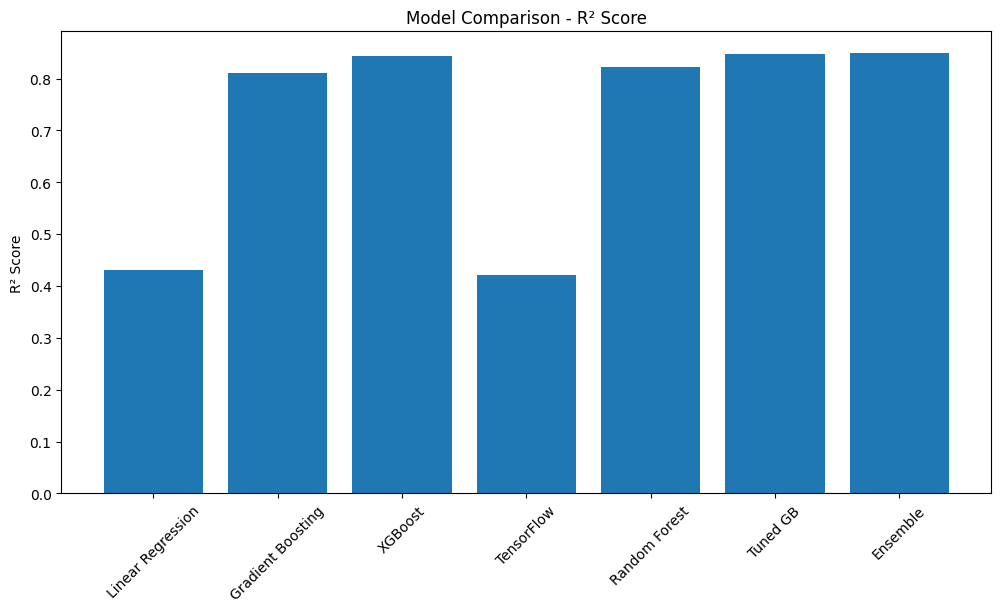

In [36]:
# Update model comparison with new metrics
models_extended = ['Linear Regression', 'Gradient Boosting', 'XGBoost', 'TensorFlow', 'Random Forest', 'Tuned GB', 'Ensemble']
mae_extended = mae_results + [ensemble_mae]
mape_extended = mape_results + [ensemble_mape]
r2_extended = [lr_r2, gb_r2, xgb_r2, tf_r2, rf_r2, best_gb_r2, ensemble_r2]

plt.figure(figsize=(12, 6))
plt.bar(models_extended, mae_extended)
plt.title('Model Comparison - Mean Absolute Error (MAE)')
plt.ylabel('MAE ($)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(models_extended, mape_extended)
plt.title('Model Comparison - Mean Absolute Percentage Error (MAPE)')
plt.ylabel('MAPE (%)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(models_extended, r2_extended)
plt.title('Model Comparison - R² Score')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.show()

In [37]:
from sklearn.impute import KNNImputer

# Impute missing values using KNN
imputer = KNNImputer(n_neighbors=5)
numeric_cols = ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Add a synthetic feature for market trend (e.g., average price per borough)
borough_avg_price = df.groupby('LOCALITY')['PRICE'].mean().to_dict()
df['BOROUGH_AVG_PRICE'] = df['LOCALITY'].map(borough_avg_price)

# Add a synthetic feature for distance to a key landmark (e.g., Central Park)
central_park_coords = (40.7829, -73.9654)  # Central Park coordinates
df['DIST_TO_CENTRAL_PARK'] = np.sqrt(
    (df['LATITUDE'] - central_park_coords[0])**2 +
    (df['LONGITUDE'] - central_park_coords[1])**2
)

# Update features list
features.extend(['BOROUGH_AVG_PRICE', 'DIST_TO_CENTRAL_PARK'])

print("Missing values imputed and new features added:")
print(df[['BOROUGH_AVG_PRICE', 'DIST_TO_CENTRAL_PARK']].head())

Missing values imputed and new features added:
   BOROUGH_AVG_PRICE  DIST_TO_CENTRAL_PARK
0       1.046288e+06              0.023474
1       1.046288e+06              0.333696
2       1.046288e+06              0.023393
3       1.046288e+06              0.108742
5       3.395000e+05              0.099168


In [38]:
# Interaction features
df['BED_BATH_INTERACTION'] = df['BEDS'] * df['BATH']
df['SQFT_PER_BED'] = df['PROPERTYSQFT'] / df['BEDS'].replace(0, 1)  # Avoid division by zero

# Neighborhood density (approximated by counting properties within a small radius)
def count_nearby_properties(row, df, radius=0.01):
    lat, lon = row['LATITUDE'], row['LONGITUDE']
    nearby = df[
        (df['LATITUDE'].between(lat - radius, lat + radius)) &
        (df['LONGITUDE'].between(lon - radius, lon + radius))
    ]
    return len(nearby)

df['NEIGHBORHOOD_DENSITY'] = df.apply(lambda row: count_nearby_properties(row, df), axis=1)

# Update features list
features.extend(['BED_BATH_INTERACTION', 'SQFT_PER_BED', 'NEIGHBORHOOD_DENSITY'])

# Re-prepare X and y with new features
X = df[features + ['TYPE', 'LOCALITY']]
y = df['PRICE']

# Re-split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("New features added:", ['BED_BATH_INTERACTION', 'SQFT_PER_BED', 'NEIGHBORHOOD_DENSITY'])

New features added: ['BED_BATH_INTERACTION', 'SQFT_PER_BED', 'NEIGHBORHOOD_DENSITY']


## Weighted Ensemble and Stacking

In [39]:
# Retrain models with new features
xgb_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
gb_grid.best_estimator_.fit(X_train_scaled, y_train)

# Get predictions
xgb_pred = xgb_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)
best_gb_pred = gb_grid.best_estimator_.predict(X_test_scaled)

# Weighted ensemble (assign weights based on performance, e.g., from cross-validation)
weights = {'XGBoost': 0.4, 'Random Forest': 0.3, 'Tuned GB': 0.3}  # Adjust based on performance
weighted_ensemble_pred = (
    weights['XGBoost'] * xgb_pred +
    weights['Random Forest'] * rf_pred +
    weights['Tuned GB'] * best_gb_pred
)

# Evaluate weighted ensemble
weighted_ensemble_mae = mean_absolute_error(y_test, weighted_ensemble_pred)
weighted_ensemble_mape = np.mean(np.abs((y_test - weighted_ensemble_pred) / y_test)) * 100
weighted_ensemble_r2 = r2_score(y_test, weighted_ensemble_pred)

print("\nWeighted Ensemble Model Evaluation:")
print(f"Mean Absolute Error (MAE): ${weighted_ensemble_mae:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {weighted_ensemble_mape:.2f}%")
print(f"R² Score: {weighted_ensemble_r2:.4f}")

# Stacking: Use a meta-model to combine predictions
from sklearn.linear_model import Ridge

# Create a dataset of predictions
stacking_X = np.column_stack((xgb_pred, rf_pred, best_gb_pred))
stacking_X_train, stacking_X_test, stacking_y_train, stacking_y_test = train_test_split(
    stacking_X, y_test, test_size=0.2, random_state=42
)

# Train a meta-model (Ridge regression)
meta_model = Ridge()
meta_model.fit(stacking_X_train, stacking_y_train)
stacking_pred = meta_model.predict(stacking_X)

# Evaluate stacking
stacking_mae = mean_absolute_error(y_test, stacking_pred)
stacking_mape = np.mean(np.abs((y_test - stacking_pred) / y_test)) * 100
stacking_r2 = r2_score(y_test, stacking_pred)

print("\nStacking Model Evaluation:")
print(f"Mean Absolute Error (MAE): ${stacking_mae:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {stacking_mape:.2f}%")
print(f"R² Score: {stacking_r2:.4f}")


Weighted Ensemble Model Evaluation:
Mean Absolute Error (MAE): $24,521.68
Mean Absolute Percentage Error (MAPE): 2.27%
R² Score: 0.9907

Stacking Model Evaluation:
Mean Absolute Error (MAE): $24,672.35
Mean Absolute Percentage Error (MAPE): 2.58%
R² Score: 0.9917


### Geospatial Clustering and Distance Features

In [40]:
from sklearn.cluster import KMeans

# Cluster properties into neighborhoods based on latitude and longitude
coords = df[['LATITUDE', 'LONGITUDE']]
kmeans = KMeans(n_clusters=10, random_state=42)  # Adjust number of clusters
df['NEIGHBORHOOD_CLUSTER'] = kmeans.fit_predict(coords)

# Add distance to subway stations (example coordinates for a few NYC subway stations)
subway_stations = [
    (40.7571, -73.9857),  # Times Square
    (40.7523, -73.9934),  # Penn Station
    (40.7061, -74.0092)   # Wall Street
]

for i, station in enumerate(subway_stations):
    df[f'DIST_TO_SUBWAY_{i}'] = np.sqrt(
        (df['LATITUDE'] - station[0])**2 +
        (df['LONGITUDE'] - station[1])**2
    )

# Update features list
features.extend(['NEIGHBORHOOD_CLUSTER'] + [f'DIST_TO_SUBWAY_{i}' for i in range(len(subway_stations))])

# Re-prepare X and y with new features
X = df[features + ['TYPE', 'LOCALITY']]
y = df['PRICE']

# Re-split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Geospatial features added:", ['NEIGHBORHOOD_CLUSTER'] + [f'DIST_TO_SUBWAY_{i}' for i in range(len(subway_stations))])

Geospatial features added: ['NEIGHBORHOOD_CLUSTER', 'DIST_TO_SUBWAY_0', 'DIST_TO_SUBWAY_1', 'DIST_TO_SUBWAY_2']


### Log Transformation and Segmented Models

In [43]:
# Log transform the target variable
df['LOG_PRICE'] = np.log1p(df['PRICE'])

# Train on log-transformed target
X_log = df[features + ['TYPE', 'LOCALITY']]
y_log = df['LOG_PRICE']
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)
X_train_log_scaled = scaler.fit_transform(X_train_log)
X_test_log_scaled = scaler.transform(X_test_log)

# Retrain XGBoost on log-transformed target
xgb_model_log = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model_log.fit(X_train_log_scaled, y_train_log)
xgb_pred_log = xgb_model_log.predict(X_test_log_scaled)

# Convert predictions back to original scale
xgb_pred_original = np.expm1(xgb_pred_log)
y_test_original = np.expm1(y_test_log)

# Evaluate
xgb_log_mae = mean_absolute_error(y_test_original, xgb_pred_original)
xgb_log_mape = np.mean(np.abs((y_test_original - xgb_pred_original) / y_test_original)) * 100
xgb_log_r2 = r2_score(y_test_original, xgb_pred_original)

print("\nXGBoost with Log Transformation Evaluation:")
print(f"Mean Absolute Error (MAE): ${xgb_log_mae:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {xgb_log_mape:.2f}%")
print(f"R² Score: {xgb_log_r2:.4f}")

# Segmented models: Train separate models for low and high price ranges
low_price_threshold = df['PRICE'].quantile(0.5)
df_low = df[df['PRICE'] <= low_price_threshold]
df_high = df[df['PRICE'] > low_price_threshold]

# Train model for low-price properties
X_low = df_low[features + ['TYPE', 'LOCALITY']]
y_low = df_low['PRICE']
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low, y_low, test_size=0.2, random_state=42)
X_train_low_scaled = scaler.fit_transform(X_train_low)
X_test_low_scaled = scaler.transform(X_test_low)

xgb_low = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_low.fit(X_train_low_scaled, y_train_low)
xgb_low_pred = xgb_low.predict(X_test_low_scaled)

# Train model for high-price properties
X_high = df_high[features + ['TYPE', 'LOCALITY']]
y_high = df_high['PRICE']
X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(X_high, y_high, test_size=0.2, random_state=42)
X_train_high_scaled = scaler.fit_transform(X_train_high)
X_test_high_scaled = scaler.transform(X_test_high)

xgb_high = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_high.fit(X_train_high_scaled, y_train_high)
xgb_high_pred = xgb_high.predict(X_test_high_scaled)

# Evaluate segmented models
print("\nSegmented Models Evaluation:")
print("Low-Price Segment:")
print(f"MAE: ${mean_absolute_error(y_test_low, xgb_low_pred):,.2f}")
print(f"MAPE: {np.mean(np.abs((y_test_low - xgb_low_pred) / y_test_low)) * 100:.2f}%")
print("High-Price Segment:")
print(f"MAE: ${mean_absolute_error(y_test_high, xgb_high_pred):,.2f}")
print(f"MAPE: {np.mean(np.abs((y_test_high - xgb_high_pred) / y_test_high)) * 100:.2f}%")


XGBoost with Log Transformation Evaluation:
Mean Absolute Error (MAE): $40,165.44
Mean Absolute Percentage Error (MAPE): 3.91%
R² Score: 0.9814

Segmented Models Evaluation:
Low-Price Segment:
MAE: $15,321.81
MAPE: 4.39%
High-Price Segment:
MAE: $52,197.71
MAPE: 3.37%


### Re-evaluate All Models

In [50]:
# Ensure the feature set is consistent
# Recompute X and y with the updated feature set
features_updated = features  # This should include all features, including new ones
X = df[features_updated + ['TYPE', 'LOCALITY']]
y = df['PRICE']

# Re-split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retrain models with the updated feature set
xgb_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
gb_grid.best_estimator_.fit(X_train_scaled, y_train)

# Retrain XGBoost with log transformation
y_log = np.log1p(y)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)
X_train_log_scaled = scaler.fit_transform(X_train_log)
X_test_log_scaled = scaler.transform(X_test_log)
xgb_model_log.fit(X_train_log_scaled, y_train_log)

# Recompute predictions with the new features
xgb_pred = xgb_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)
best_gb_pred = gb_grid.best_estimator_.predict(X_test_scaled)
xgb_pred_log = xgb_model_log.predict(X_test_log_scaled)
xgb_pred_original = np.expm1(xgb_pred_log)  # Convert back to original scale

# Recompute ensemble predictions
weighted_ensemble_pred = (0.4 * xgb_pred + 0.3 * rf_pred + 0.3 * best_gb_pred)

# Recompute stacking predictions
stacking_X = np.column_stack((xgb_pred, rf_pred, best_gb_pred))
stacking_X_train, stacking_X_test, stacking_y_train, stacking_y_test = train_test_split(
    stacking_X, y_test, test_size=0.2, random_state=42
)
meta_model = Ridge()
meta_model.fit(stacking_X_train, stacking_y_train)
stacking_pred = meta_model.predict(stacking_X)

# Evaluate all models (excluding CatBoost)
models_updated = {
    'XGBoost': xgb_pred,
    'Random Forest': rf_pred,
    'Tuned GB': best_gb_pred,
    'Weighted Ensemble': weighted_ensemble_pred,
    'Stacking': stacking_pred,
    'XGBoost (Log)': xgb_pred_original
}

for model_name, predictions in models_updated.items():
    mae = mean_absolute_error(y_test, predictions)
    mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
    r2 = r2_score(y_test, predictions)
    print(f"\n{model_name} Updated Evaluation:")
    print(f"MAE: ${mae:,.2f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"R²: {r2:.4f}")


XGBoost Updated Evaluation:
MAE: $32,628.62
MAPE: 3.42%
R²: 0.9884

Random Forest Updated Evaluation:
MAE: $28,591.40
MAPE: 2.55%
R²: 0.9875

Tuned GB Updated Evaluation:
MAE: $25,638.07
MAPE: 2.42%
R²: 0.9903

Weighted Ensemble Updated Evaluation:
MAE: $25,435.34
MAPE: 2.37%
R²: 0.9903

Stacking Updated Evaluation:
MAE: $26,092.10
MAPE: 2.71%
R²: 0.9912

XGBoost (Log) Updated Evaluation:
MAE: $40,165.44
MAPE: 3.91%
R²: 0.9814


In [54]:
!pip install h2o
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init()

# Convert data to H2O frame
h2o_df = h2o.H2OFrame(df[features + ['TYPE', 'LOCALITY', 'PRICE']])

# Split data
train, test = h2o_df.split_frame(ratios=[0.8], seed=42)

# Define target and features
x = features + ['TYPE', 'LOCALITY']
y = 'PRICE'

# Run AutoML
aml = H2OAutoML(max_models=10, seed=42, max_runtime_secs=300)
aml.train(x=x, y=y, training_frame=train)

# Get the best model
best_model = aml.leader

# Predict and evaluate
h2o_pred = best_model.predict(test).as_data_frame()['predict'].values
h2o_actual = test[y].as_data_frame()[y].values

h2o_mae = mean_absolute_error(h2o_actual, h2o_pred)
h2o_mape = np.mean(np.abs((h2o_actual - h2o_pred) / h2o_actual)) * 100
h2o_r2 = r2_score(h2o_actual, h2o_pred)

print("\nH2O AutoML Best Model Evaluation:")
print(f"Model Type: {best_model.model_id}")
print(f"Mean Absolute Error (MAE): ${h2o_mae:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {h2o_mape:.2f}%")
print(f"R² Score: {h2o_r2:.4f}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 1.9 MB/s eta 0:00:00
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.26" 2025-01-21; OpenJDK Runtime Environment (build 11.0.26+4-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.26+4-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpb5bd4s7d
  JVM stdout: /tmp/tmpb5bd4s7d/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpb5bd4s7d/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,6 days
H2O_cluster_name:,H2O_from_python_unknownUser_ocm9sn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"



H2O AutoML Best Model Evaluation:
Model Type: StackedEnsemble_AllModels_1_AutoML_1_20250402_184634
Mean Absolute Error (MAE): $42,950.36
Mean Absolute Percentage Error (MAPE): 5.36%
R² Score: 0.9826
